<a href="https://colab.research.google.com/github/aditiphopale/Predicting-the-reccurence-of-breast-cancer-cells/blob/master/RMSProject_V0_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import sys

from sklearn import (
    linear_model, metrics, neural_network, pipeline, preprocessing, model_selection
)

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_row', 1000)

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=129JPWF6XDifE8NiMlZZDrpP9d7hp3_KR'

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

129JPWF6XDifE8NiMlZZDrpP9d7hp3_KR


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('UCF_TLDClustering.txt')  
data = pd.read_csv('UCF_TLDClustering.txt', sep="\|\|", engine='python')

In [0]:
data.columns = ["StoreID", "StoreGroup", "PeriodID", "TicketID", "ItemName", "ItemCategory", "Qty", "Sales", "Modifier"]

In [0]:
data.head()

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
0,1{,}A{,}20180801{,}1{,}Chevy Ajax{,}Automobile{,}1{,}499{,}0
1,1{,}A{,}20180801{,}2{,}Chevy Spark{,}Automobile{,}1{,}499{,}0
2,1{,}A{,}20180801{,}3{,}Chevy Colorado{,}Automobile{,}1{,}799{,}0
3,1{,}A{,}20180801{,}3{,}Chevy Gemini{,}Automobile{,}1{,}679{,}0
4,1{,}A{,}20180801{,}3{,}WND{,}Phones{,}2{,}0{,}1


In [0]:
data.describe()

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
count,12811321,12811321,12811321,12811321,12811321,12811321,12811321,12811321,12811321
unique,90,7,365,498,397,7,91,1203,2
top,202{,}F{,}20190302{,}32{,}Apple{,}Automobile{,}1{,}0{,}0
freq,298687,2053989,54210,100581,1313144,5724853,10850445,1851939,10959386


In [0]:
df = pd.DataFrame(data) 

Cleaning data - removal of '{' and '}'

In [0]:
df = df.applymap(lambda x: x.replace('{', ''))

In [0]:
df = df.applymap(lambda x: x.replace('}', ''))

In [0]:
df.head(10)

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
0,1,A,20180801,1,Chevy Ajax,Automobile,1,499,0
1,1,A,20180801,2,Chevy Spark,Automobile,1,499,0
2,1,A,20180801,3,Chevy Colorado,Automobile,1,799,0
3,1,A,20180801,3,Chevy Gemini,Automobile,1,679,0
4,1,A,20180801,3,WND,Phones,2,0,1
5,1,A,20180801,4,Luxury Package,Accessories,1,199,0
6,1,A,20180801,4,Apple,Phones,2,378,0
7,1,A,20180801,4,Ford Expedition,Automobile,1,829,0
8,1,A,20180801,4,Bose Speakers,Accessories,1,299,0
9,1,A,20180801,5,Chevy Spark,Automobile,1,499,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12811321 entries, 0 to 12811320
Data columns (total 9 columns):
StoreID         object
StoreGroup      object
PeriodID        object
TicketID        object
ItemName        object
ItemCategory    object
Qty             object
Sales           object
Modifier        object
dtypes: object(9)
memory usage: 879.7+ MB


In [0]:
df.loc[df.isna().any(axis=1),:]

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier


In [0]:
df.describe(include='all')

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
count,12811321,12811321,12811321,12811321,12811321,12811321,12811321,12811321,12811321
unique,90,7,365,498,397,7,91,1203,2
top,202,F,20190302,32,Apple,Automobile,1,0,0
freq,298687,2053989,54210,100581,1313144,5724853,10850445,1851939,10959386


In [0]:
df.StoreGroup.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

![alt text](https://)Filtering data with StoreID value as 1

In [0]:
df1 = df[df.StoreID =='1']

In [0]:
df1.head(10)

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
0,1,A,20180801,1,Chevy Ajax,Automobile,1,499,0
1,1,A,20180801,2,Chevy Spark,Automobile,1,499,0
2,1,A,20180801,3,Chevy Colorado,Automobile,1,799,0
3,1,A,20180801,3,Chevy Gemini,Automobile,1,679,0
4,1,A,20180801,3,WND,Phones,2,0,1
5,1,A,20180801,4,Luxury Package,Accessories,1,199,0
6,1,A,20180801,4,Apple,Phones,2,378,0
7,1,A,20180801,4,Ford Expedition,Automobile,1,829,0
8,1,A,20180801,4,Bose Speakers,Accessories,1,299,0
9,1,A,20180801,5,Chevy Spark,Automobile,1,499,0


In [0]:
df1.describe(include='all')

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
count,98675,98675,98675,98675,98675,98675,98675,98675,98675
unique,1,1,339,249,274,7,11,317,2
top,1,A,20190330,36,Apple,Automobile,1,199,0
freq,98675,98675,898,1080,13731,46563,83046,13458,87394


In [0]:
df1.ItemName.unique()

array(['Chevy Ajax', 'Chevy Spark', 'Chevy Colorado', 'Chevy Gemini',
       'WND', 'Luxury Package', 'Apple', 'Ford Expedition',
       'Bose Speakers', 'Chevy Cavalier', 'Chevy Nova',
       'Ford Quadricycle', 'Rear Spoiler', 'Samsung', 'Ford Focus',
       'Chrysler 300', 'Chrysler Prowler', 'Vehicle Cover',
       'Premium Seat Covers', 'Spare Tire Cover', 'Toyota Tundra',
       'Kia Sedona', 'Ford F150', 'Google', 'Chevy Cobalt', 'Ford E150',
       'Preimum Car Wash', 'Towing Package', 'Ford Camete',
       'French Bulldog', 'Dodge Durango', 'LG', 'Dodge Stratus',
       'Chevy Caprice', 'Allview', 'Ford Taurus', 'Lincoln 2010',
       'Chevy 210', 'Apartment', 'Merida', 'Single Family (Detached)',
       'Golden Retriever', 'Chrysler Fifth Avenue', 'Chrysler Newport',
       'Ford Five Hundred', 'Alan', 'Amazon', 'Microsoft', 'Townhome',
       'Chevy TrailBlazer', 'Toyota 4Runner', 'Ford Crown Victoria',
       'Cannondale', 'Ford Explorer Sport-Trac', 'Car Sales Decal',
    

In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98675 entries, 0 to 98674
Data columns (total 9 columns):
StoreID         98675 non-null object
StoreGroup      98675 non-null object
PeriodID        98675 non-null object
TicketID        98675 non-null object
ItemName        98675 non-null object
ItemCategory    98675 non-null object
Qty             98675 non-null object
Sales           98675 non-null object
Modifier        98675 non-null object
dtypes: object(9)
memory usage: 7.5+ MB


In [0]:
type(df1)

pandas.core.frame.DataFrame

In [0]:
df1.StoreGroup.unique()

array(['A'], dtype=object)

In [0]:
df1.ItemName.unique()
#df1.ItemCategory.unique()

array(['Chevy Ajax', 'Chevy Spark', 'Chevy Colorado', 'Chevy Gemini',
       'WND', 'Luxury Package', 'Apple', 'Ford Expedition',
       'Bose Speakers', 'Chevy Cavalier', 'Chevy Nova',
       'Ford Quadricycle', 'Rear Spoiler', 'Samsung', 'Ford Focus',
       'Chrysler 300', 'Chrysler Prowler', 'Vehicle Cover',
       'Premium Seat Covers', 'Spare Tire Cover', 'Toyota Tundra',
       'Kia Sedona', 'Ford F150', 'Google', 'Chevy Cobalt', 'Ford E150',
       'Preimum Car Wash', 'Towing Package', 'Ford Camete',
       'French Bulldog', 'Dodge Durango', 'LG', 'Dodge Stratus',
       'Chevy Caprice', 'Allview', 'Ford Taurus', 'Lincoln 2010',
       'Chevy 210', 'Apartment', 'Merida', 'Single Family (Detached)',
       'Golden Retriever', 'Chrysler Fifth Avenue', 'Chrysler Newport',
       'Ford Five Hundred', 'Alan', 'Amazon', 'Microsoft', 'Townhome',
       'Chevy TrailBlazer', 'Toyota 4Runner', 'Ford Crown Victoria',
       'Cannondale', 'Ford Explorer Sport-Trac', 'Car Sales Decal',
    

In [0]:
df1.describe(include='all')

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
count,98675,98675,98675,98675,98675,98675,98675,98675,98675
unique,1,1,339,249,274,7,11,317,2
top,1,A,20190330,36,Apple,Automobile,1,199,0
freq,98675,98675,898,1080,13731,46563,83046,13458,87394


Cleaning the ItemNames column values

In [0]:
df1['ItemName'] = df1['ItemName'].str.replace(' ','-')
df1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
0,1,A,20180801,1,Chevy-Ajax,Automobile,1,499,0
1,1,A,20180801,2,Chevy-Spark,Automobile,1,499,0
2,1,A,20180801,3,Chevy-Colorado,Automobile,1,799,0
3,1,A,20180801,3,Chevy-Gemini,Automobile,1,679,0
4,1,A,20180801,3,WND,Phones,2,0,1


In [0]:
df1.ItemName.unique()

array(['Chevy-Ajax', 'Chevy-Spark', 'Chevy-Colorado', 'Chevy-Gemini',
       'WND', 'Luxury-Package', 'Apple', 'Ford-Expedition',
       'Bose-Speakers', 'Chevy-Cavalier', 'Chevy-Nova',
       'Ford-Quadricycle', 'Rear-Spoiler', 'Samsung', 'Ford-Focus',
       'Chrysler-300', 'Chrysler-Prowler', 'Vehicle-Cover',
       'Premium-Seat-Covers', 'Spare-Tire-Cover', 'Toyota-Tundra',
       'Kia-Sedona', 'Ford-F150', 'Google', 'Chevy-Cobalt', 'Ford-E150',
       'Preimum-Car-Wash', 'Towing-Package', 'Ford-Camete',
       'French-Bulldog', 'Dodge-Durango', 'LG', 'Dodge-Stratus',
       'Chevy-Caprice', 'Allview', 'Ford-Taurus', 'Lincoln-2010',
       'Chevy-210', 'Apartment', 'Merida', 'Single-Family-(Detached)',
       'Golden-Retriever', 'Chrysler-Fifth-Avenue', 'Chrysler-Newport',
       'Ford-Five-Hundred', 'Alan', 'Amazon', 'Microsoft', 'Townhome',
       'Chevy-TrailBlazer', 'Toyota-4Runner', 'Ford-Crown-Victoria',
       'Cannondale', 'Ford-Explorer-Sport-Trac', 'Car-Sales-Decal',
    

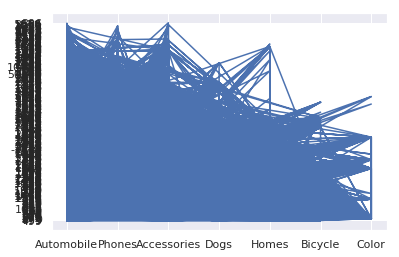

In [0]:
plt.plot(df1.ItemCategory, df1.Sales)
plt.show()

Creating dataframe 'dfS1TimeFrame1' for Store 1 and timeframe upto December 31 2018

In [0]:
dfS1TimeFrame1 = df1[df1.PeriodID <= '20181231']

Creating dataframe  'dfS1TimeFrame1' for Store 1 and timeframe from January 1st to July 31st 2019

In [0]:
dfS1TimeFrame2 = df1[df1.PeriodID >= '20190101']

In [0]:
dfS1TimeFrame1.info()
dfS1TimeFrame2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42859 entries, 0 to 42858
Data columns (total 9 columns):
StoreID         42859 non-null object
StoreGroup      42859 non-null object
PeriodID        42859 non-null object
TicketID        42859 non-null object
ItemName        42859 non-null object
ItemCategory    42859 non-null object
Qty             42859 non-null object
Sales           42859 non-null object
Modifier        42859 non-null object
dtypes: object(9)
memory usage: 3.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 55816 entries, 42859 to 98674
Data columns (total 9 columns):
StoreID         55816 non-null object
StoreGroup      55816 non-null object
PeriodID        55816 non-null object
TicketID        55816 non-null object
ItemName        55816 non-null object
ItemCategory    55816 non-null object
Qty             55816 non-null object
Sales           55816 non-null object
Modifier        55816 non-null object
dtypes: object(9)
memory usage: 4.3+ MB


In [0]:
dfS1TimeFrame1.head()

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
0,1,A,20180801,1,Chevy-Ajax,Automobile,1,499,0
1,1,A,20180801,2,Chevy-Spark,Automobile,1,499,0
2,1,A,20180801,3,Chevy-Colorado,Automobile,1,799,0
3,1,A,20180801,3,Chevy-Gemini,Automobile,1,679,0
4,1,A,20180801,3,WND,Phones,2,0,1


In [0]:
dfS1TimeFrame2.StoreID.iloc[0]

'1'

In [0]:
min(dfS1TimeFrame1.Sales)

'-1698'

In [0]:
negativeVal = dfS1TimeFrame1[dfS1TimeFrame1.Sales < '0']
negativeVal

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
2251,1,A,20180809,33,Ford-Focus,Automobile,2,-1698,0
2252,1,A,20180809,33,Google,Phones,1,-199,0


Correcting two negative values to positive

In [0]:
dfS1TimeFrame1['Sales'] = dfS1TimeFrame1['Sales'].str.replace('-','')
dfS1TimeFrame1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
0,1,A,20180801,1,Chevy-Ajax,Automobile,1,499,0
1,1,A,20180801,2,Chevy-Spark,Automobile,1,499,0
2,1,A,20180801,3,Chevy-Colorado,Automobile,1,799,0
3,1,A,20180801,3,Chevy-Gemini,Automobile,1,679,0
4,1,A,20180801,3,WND,Phones,2,0,1


In [0]:
negativeVal = dfS1TimeFrame1[dfS1TimeFrame1.Sales < '0']
negativeVal

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier


Changing the numerical value columns to int variable

In [0]:
dfS1TimeFrame1['StoreID'] = dfS1TimeFrame1['StoreID'].astype(str).astype(int)
dfS1TimeFrame1['PeriodID'] = dfS1TimeFrame1['PeriodID'].astype(str).astype(int)
dfS1TimeFrame1['TicketID'] = dfS1TimeFrame1['TicketID'].astype(str).astype(int)
dfS1TimeFrame1['Qty'] = dfS1TimeFrame1['Qty'].astype(str).astype(int)
dfS1TimeFrame1['Sales'] = dfS1TimeFrame1['Sales'].astype(str).astype(int)
dfS1TimeFrame1['Modifier'] = dfS1TimeFrame1['Modifier'].astype(str).astype(int)
#dfS1TimeFrame1['StoreGroup'] = dfS1TimeFrame1['StoreGroup'].astype('str')
#dfS1TimeFrame1['ItemName'] = dfS1TimeFrame1['ItemName'].astype('str')
#dfS1TimeFrame1['ItemCategory'] = dfS1TimeFrame1['ItemCategory'].astype('str')
dfS1TimeFrame1.info()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42859 entries, 0 to 42858
Data columns (total 9 columns):
StoreID         42859 non-null int64
StoreGroup      42859 non-null object
PeriodID        42859 non-null int64
TicketID        42859 non-null int64
ItemName        42859 non-null object
ItemCategory    42859 non-null object
Qty             42859 non-null int64
Sales           42859 non-null int64
Modifier        42859 non-null int64
dtypes: int64(6), object(3)
memory usage: 3.3+ MB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Scatterplot of TicketID vs Quantity

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


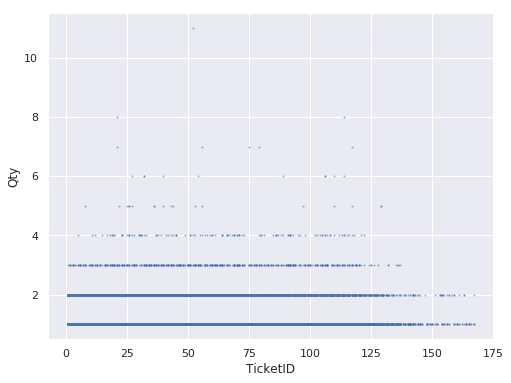

In [0]:
def var_scatter(dfS1TimeFrame1, var):
    ax=None
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))
    dfS1TimeFrame1.plot.scatter(x=var , y="Qty", alpha=0.35, s=1.5, ax=ax)

    return ax

var_scatter(dfS1TimeFrame1, "TicketID");

Plot of Sales amount with respect to Period

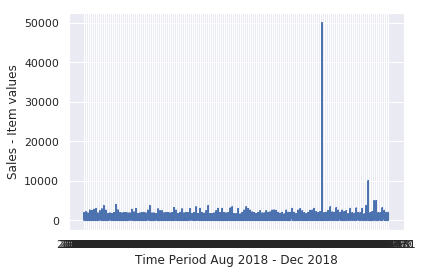

In [0]:
plt.plot(dfS1TimeFrame1.PeriodID, dfS1TimeFrame1.Sales)
plt.xlabel('Time Period Aug 2018 - Dec 2018')
plt.ylabel('Sales - Item values')
plt.show()

Comparision plot of Quantity and Sales with respect to each Ticket ID

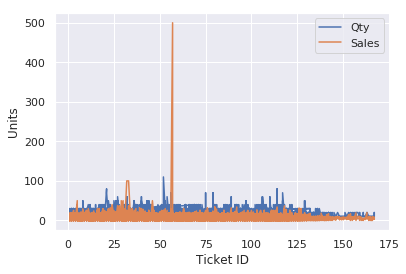

In [0]:
plt.plot(dfS1TimeFrame1.TicketID,dfS1TimeFrame1.Qty * 10)
plt.plot(dfS1TimeFrame1.TicketID,dfS1TimeFrame1.Sales/10**2)
plt.legend(['Qty', 'Sales'])
plt.xlabel('Ticket ID')
plt.ylabel('Units')
plt.show()

Comparision of Quantity and Sales with respect to each TicketID as percentage growth when compared with sales amount of first TicketID

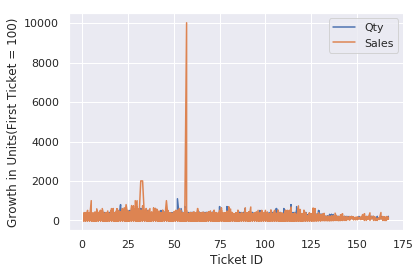

In [0]:
plt.plot(dfS1TimeFrame1.TicketID,dfS1TimeFrame1.Qty / dfS1TimeFrame1.Qty.iloc[0] * 100)
plt.plot(dfS1TimeFrame1.TicketID,dfS1TimeFrame1.Sales / dfS1TimeFrame1.Sales.iloc[0]*100)
plt.legend(['Qty', 'Sales'])
plt.xlabel('Ticket ID')
plt.ylabel('Growth in Units(First Ticket = 100)')
plt.show()

Determining the outlier Sales amount 

In [0]:
maxSalesValue = dfS1TimeFrame1[dfS1TimeFrame1.Sales > 5000]
maxSalesValue

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
32908,1,A,20181128,57,Keychain,Accessories,1,50000,0
39175,1,A,20181221,32,Keychain,Accessories,1,10000,0
39176,1,A,20181221,33,Keychain,Accessories,1,10000,0


Pattern of higher sales value for respective ItemName 'Keychain'

In [0]:
itemKC = dfS1TimeFrame1[dfS1TimeFrame1.ItemName == 'Keychain']
itemKC

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
4050,1,A,20180817,24,Keychain,Accessories,1,4000,0
26243,1,A,20181105,25,Keychain,Accessories,1,2500,0
30952,1,A,20181122,34,Keychain,Accessories,1,2500,0
31660,1,A,20181124,11,Keychain,Accessories,1,3000,0
32908,1,A,20181128,57,Keychain,Accessories,1,50000,0
34370,1,A,20181203,23,Keychain,Accessories,1,1000,0
35228,1,A,20181207,28,Keychain,Accessories,2,2000,0
36708,1,A,20181212,22,Keychain,Accessories,1,3000,0
39145,1,A,20181221,20,Keychain,Accessories,1,500,0
39172,1,A,20181221,29,Keychain,Accessories,1,5000,0


Determining higher quantity order ticketids

In [0]:
maxQtyValue = dfS1TimeFrame1[dfS1TimeFrame1.Qty > 5]
maxQtyValue

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
4556,1,A,20180818,114,Apple,Phones,8,1512,0
6772,1,A,20180826,106,WND,Phones,6,0,1
7998,1,A,20180901,56,Google,Phones,7,1393,0
8919,1,A,20180903,79,WND,Phones,7,0,1
11622,1,A,20180914,54,WND,Phones,6,0,1
12140,1,A,20180915,114,Google,Phones,6,1194,0
12621,1,A,20180916,106,LG,Phones,6,1494,0
13451,1,A,20180921,32,WND,Phones,6,0,1
16672,1,A,20181003,32,Google,Phones,6,1194,0
27861,1,A,20181111,27,WND,Phones,6,0,1


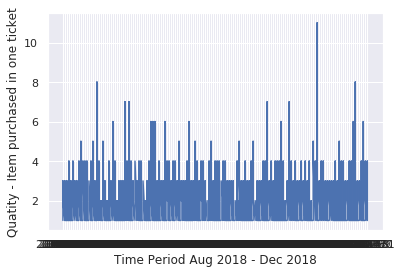

In [0]:
plt.plot(dfS1TimeFrame1.PeriodID, dfS1TimeFrame1.Qty)
plt.xlabel('Time Period Aug 2018 - Dec 2018')
plt.ylabel('Quatity - Item purchased in one ticket')
plt.show()

Order details with 0 sales amount

In [0]:
zeroSales = dfS1TimeFrame1[dfS1TimeFrame1.Sales == 0]
zeroSales.describe(include='all')

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
count,4667.0,4667,4667,4667.000000,4667,4667,4667.000000,4667.0,4667.0
unique,NaN,1,153,NaN,5,3,NaN,NaN,NaN
top,NaN,A,20181118,NaN,WND,Phones,NaN,NaN,NaN
freq,NaN,4667,64,NaN,3850,4109,NaN,NaN,NaN
mean,1.0,NaN,NaN,53.760874,NaN,NaN,1.367474,0.0,1.0
std,0.0,NaN,NaN,33.177054,NaN,NaN,0.688648,0.0,0.0
min,1.0,NaN,NaN,1.000000,NaN,NaN,1.000000,0.0,1.0
25%,1.0,NaN,NaN,26.000000,NaN,NaN,1.000000,0.0,1.0
50%,1.0,NaN,NaN,50.000000,NaN,NaN,1.000000,0.0,1.0
75%,1.0,NaN,NaN,76.000000,NaN,NaN,2.000000,0.0,1.0


In [0]:
dfS1TimeFrame1

,StoreID,StoreGroup,PeriodID,TicketID,ItemName,ItemCategory,Qty,Sales,Modifier
0,1,A,20180801,1,Chevy-Ajax,Automobile,1,499,0
1,1,A,20180801,2,Chevy-Spark,Automobile,1,499,0
2,1,A,20180801,3,Chevy-Colorado,Automobile,1,799,0
3,1,A,20180801,3,Chevy-Gemini,Automobile,1,679,0
4,1,A,20180801,3,WND,Phones,2,0,1
5,1,A,20180801,4,Luxury-Package,Accessories,1,199,0
6,1,A,20180801,4,Apple,Phones,2,378,0
7,1,A,20180801,4,Ford-Expedition,Automobile,1,829,0
8,1,A,20180801,4,Bose-Speakers,Accessories,1,299,0
9,1,A,20180801,5,Chevy-Spark,Automobile,1,499,0


Create Corpus for ItemName

In [0]:
def CreateCorpusFromDataFrame(inputData):
    itemNameDict = {}
    id = 1
    try:
        corpusfile = open('itemNameDocument.txt', 'w')
        corpusfile.write('StoreID|PeriodID|TicketID|ItemName\n')

        for index, r in inputData.iterrows():
            storeID = r['StoreID']
            periodID = r['PeriodID']
            ticketID = r['TicketID']
            itemName = r['ItemName']
            qty = r['Qty']
            testName = ""
            keyVal = periodID+ticketID
            #print(":::::::::"+keyVal)

            if keyVal in itemNameDict:
                value = itemNameDict[keyVal]
                c_itemname = value.split('|')[3]
                if qty > 1:
                    for x in range(qty):
                        if testName == "":
                            testName = itemName
                        else:
                            testName =  testName +' '+itemName
                else:
                    testName = itemName

                n_itemname = c_itemname + ' ' + testName
                corpusString = str(storeID) + "|" + str(periodID) + "|" + str(ticketID) + "|" + str(n_itemname)
                itemNameDict.update({keyVal: corpusString})
            else:
                if qty > 1:
                    for x in range(qty):
                        if testName == "":
                            testName = itemName
                        else:
                            testName =  testName +' '+itemName
                else:
                    testName = itemName
                corpusString = str(storeID) + "|" + str(periodID) + "|" + str(ticketID) + "|" + str(testName)
                itemNameDict.update({keyVal: corpusString})

            id = id + 1
            testName = ""

        for x in itemNameDict:
            corpusfile.write(itemNameDict[x] + '\n')

    finally:
        corpusfile.close()


CreateCorpusFromDataFrame(dfS1TimeFrame1)

Create Corpus for Item Category

In [0]:
def CreateCorpusFromDataFrame(inputData):
    itemCategoryDict = {}
    id = 1
    try:
        corpusfile = open('itemCategoryDocument.txt', 'w')
        corpusfile.write('StoreID|PeriodID|TicketID|ItemCategory\n')

        for index, r in inputData.iterrows():
            storeID = r['StoreID']
            periodID = r['PeriodID']
            ticketID = r['TicketID']
            itemCategory = r['ItemCategory']
            qty = r['Qty']
            testCategory = ""
            keyVal = periodID+ticketID
            #print(":::::::::"+keyVal)

            if keyVal in itemCategoryDict:
                value = itemCategoryDict[keyVal]
                c_itemCategory = value.split('|')[3]
                if qty > 1:
                    for x in range(qty):
                        if testCategory == "":
                            testCategory = itemCategory
                        else:
                            testCategory =  testCategory +' '+itemCategory
                else:
                    testCategory = itemCategory

                n_itemCategory = c_itemCategory + ' ' + testCategory
                corpusString = str(storeID) + "|" + str(periodID) + "|" + str(ticketID) + "|" + str(n_itemCategory)
                itemCategoryDict.update({keyVal: corpusString})
            else:
                if qty > 1:
                    for x in range(qty):
                        if testCategory == "":
                            testCategory = itemCategory
                        else:
                            testCategory =  testCategory +' '+itemCategory
                else:
                    testCategory = itemCategory
                corpusString = str(storeID) + "|" + str(periodID) + "|" + str(ticketID) + "|" + str(testCategory)
                itemCategoryDict.update({keyVal: corpusString})

            id = id + 1
            testCategory = ""

        for x in itemCategoryDict:
            corpusfile.write(itemCategoryDict[x] + '\n')

    finally:
        corpusfile.close()


CreateCorpusFromDataFrame(dfS1TimeFrame1)

#read corpus document for ItemCategory

In [0]:
linkName = 'https://drive.google.com/open?id=1gmDuel_V3EPRUpvMtX2ebCrWW6zOCJQn'
fluff, id = linkName.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('itemCategoryDocument.txt')  
itemCategoryData = pd.read_csv('itemCategoryDocument.txt', sep="|", engine='python')
itemCategoryData.info()

1gmDuel_V3EPRUpvMtX2ebCrWW6zOCJQn
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13518 entries, 0 to 13517
Data columns (total 4 columns):
StoreID         13518 non-null int64
PeriodID        13518 non-null int64
TicketID        13518 non-null int64
ItemCategory    13518 non-null object
dtypes: int64(3), object(1)
memory usage: 422.5+ KB


In [0]:
itemCategoryData.head()

,StoreID,PeriodID,TicketID,ItemCategory
0,1,20180801,1,Automobile
1,1,20180801,2,Automobile
2,1,20180801,3,Automobile Automobile Phones Phones
3,1,20180801,4,Accessories Phones Phones Automobile Accessories
4,1,20180801,5,Automobile


#read corpus document for ItemName

In [0]:
linkName = 'https://drive.google.com/open?id=1pwXwOQHEwSQMu5Rmon80lLOkA0gvn87C'
fluff, id = linkName.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('itemNameDocument.txt')  
itemNameData = pd.read_csv('itemNameDocument.txt', sep="|", engine='python')
itemNameData.info()

1pwXwOQHEwSQMu5Rmon80lLOkA0gvn87C
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13518 entries, 0 to 13517
Data columns (total 4 columns):
StoreID     13518 non-null int64
PeriodID    13518 non-null int64
TicketID    13518 non-null int64
ItemName    13518 non-null object
dtypes: int64(3), object(1)
memory usage: 422.5+ KB


In [0]:
itemNameData.head()

,StoreID,PeriodID,TicketID,ItemName
0,1,20180801,1,Chevy-Ajax
1,1,20180801,2,Chevy-Spark
2,1,20180801,3,Chevy-Colorado Chevy-Gemini WND WND
3,1,20180801,4,Luxury-Package Apple Apple Ford-Expedition Bos...
4,1,20180801,5,Chevy-Spark


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
import operator

In [0]:
#select column to convert to list here
itemNameCorpus = itemNameData["ItemName"].tolist()
#itemNameCorpus
itemNameCorpus = [x.lower() for x in itemNameCorpus]
len(itemNameCorpus)

13518

In [0]:
#set() takes the unique values and set in vocabulary
vocabulary = set()
for documentValue in itemNameCorpus:
    vocabulary.update(documentValue.split())

len(vocabulary)

250

In [0]:
print(vocabulary)

{'kia-telluride', 'radar-detector', 'kia-stinger', 'toyota-land-cruiser', 'saturn-ion', 'archos', 'kia-k4', 'apartment', 'jumper-cables', 'luxury-package', 'chevy-cavalier', 'dodge-durango', 'dodge-400', 'trek', 'ford-flex', 'chevy-traverse', 'chevy-forester', 'ford-explorer-sport-trac', 'chevy-spark', 'dodge-kingsway', 'ford-f250', '600w-power-inverter', 'chrysler-royal', 'toyota-crown', 'crimson', 'fuji', 'chevy-constantia', 'kia-optima', 'wnd', 'multi-family', 'roll-cage', 'dodge-intrepid', 'chevy-c/k', 'chrysler-cordoba', 'australian-shepherd', 'chrysler-sebring', 'chevy-monte-carlo', 'chrysler-300', 'luggage-hauler', 'chevy-van', 'ford-quadricycle', 'chrysler-prowler', 'chevy-gemini', 'ford-five-hundred', 'sony', 'ford-escort', 'toyota-4runner', 'chevy-mercury', 'apple', 'worksman-cycles', 'sport-package', 'alan', 'smart-dirving-assistant', 'german-pointer', 'ford-ranch-wagon', '400w-power-inverter', 'dodge-ram-3500', 'ford-e150', 'at&t', 'ranch-style', 'ford-laser', 'regular-floo

In [0]:
vocabulary = list(vocabulary)

In [0]:
#vocabulary

In [0]:
#assigning index value to each vocabulary word
wordInd = {word: idx for idx, word in enumerate(vocabulary)}

In [0]:
#wordInd

In [0]:
tfidf = TfidfVectorizer(vocabulary=vocabulary)

In [0]:
tfidf.fit(itemNameCorpus)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use...
                            'kia-k4', 'apartment', 'jumper-cables',
                            'luxury-package', 'chevy-cavalier', 'dodge-durango',
                            'dodge-400', 'trek', 'ford-flex', 'chevy-traverse',
                            'chevy-forester', 'ford-explorer-sport-trac',
                            'chevy-spark', 'dodge-kingsway', 'ford-f250',
                            '600w-power-inverter', 'chrysler-royal',
                            'toyota-crown', 'crimson', 'fuji',
                    

In [0]:
tfidf.transform(itemNameCorpus)

<13518x250 sparse matrix of type '<class 'numpy.float64'>'
	with 17676 stored elements in Compressed Sparse Row format>

In [0]:
tfidfItemNameDF = pd.DataFrame()
map = {'400w-power-inverter': 0,
 '600w-power-inverter': 0,
 'alan': 0,
 'allview': 0,
 'amazon': 0,
 'amoi': 0,
 'apartment': 0,
 'apple': 0,
 'archos': 0,
 'asus': 0,
 'at&t': 0,
 'australian-shepherd': 0,
 'backup-camera': 0,
 'benq-siemens': 0,
 'bike-hauler': 0,
 'blackberry': 0,
 'blackview': 0,
 'bmc': 0,
 'bobble-head': 0,
 'bose-speakers': 0,
 'boxer': 0,
 'built-in-phone': 0,
 'bungalow': 0,
 'cabin': 0,
 'cannondale': 0,
 'car-sales-decal': 0,
 'carriage/coach': 0,
 'chalet': 0,
 'chevy-210': 0,
 'chevy-ajax': 0,
 'chevy-astro': 0,
 'chevy-beretta': 0,
 'chevy-blazer': 0,
 'chevy-c/k': 0,
 'chevy-camaro': 0,
 'chevy-cameo': 0,
 'chevy-caprice': 0,
 'chevy-cavalier': 0,
 'chevy-celta': 0,
 'chevy-chevelle': 0,
 'chevy-cobalt': 0,
 'chevy-colorado': 0,
 'chevy-constantia': 0,
 'chevy-corvair': 0,
 'chevy-delray': 0,
 'chevy-forester': 0,
 'chevy-g506': 0,
 'chevy-gemini': 0,
 'chevy-greenbrier': 0,
 'chevy-hhr': 0,
 'chevy-impala': 0,
 'chevy-lakewood': 0,
 'chevy-lanos': 0,
 'chevy-lee': 0,
 'chevy-mercury': 0,
 'chevy-monte-carlo': 0,
 'chevy-nova': 0,
 'chevy-onix': 0,
 'chevy-sonic': 0,
 'chevy-spark': 0,
 'chevy-standard': 0,
 'chevy-tahoe': 0,
 'chevy-trailblazer': 0,
 'chevy-traverse': 0,
 'chevy-uplander': 0,
 'chevy-van': 0,
 'chevy-vega': 0,
 'chevy-viking': 0,
 'chevy-viva': 0,
 'chrysler-300': 0,
 'chrysler-airstream': 0,
 'chrysler-aspen': 0,
 'chrysler-cordoba': 0,
 'chrysler-crossfire': 0,
 'chrysler-fifth-avenue': 0,
 'chrysler-newport': 0,
 'chrysler-prowler': 0,
 'chrysler-royal': 0,
 'chrysler-saratoga': 0,
 'chrysler-sebring': 0,
 'chrysler-sunbeem': 0,
 'chrysler-town-and-country': 0,
 'co-op': 0,
 'condominium': 0,
 'cooler': 0,
 'cottage': 0,
 'crimson': 0,
 'dash-camera': 0,
 'desert-sand': 0,
 'dodge-330': 0,
 'dodge-400': 0,
 'dodge-aries': 0,
 'dodge-durango': 0,
 'dodge-intrepid': 0,
 'dodge-kingsway': 0,
 'dodge-lancer': 0,
 'dodge-meadowbrook': 0,
 'dodge-olara': 0,
 'dodge-omni': 0,
 'dodge-ram-2500': 0,
 'dodge-ram-3500': 0,
 'dodge-stratus': 0,
 'dodge-viper': 0,
 'emergency-roadside-kit': 0,
 'febreeze-spray': 0,
 'felt': 0,
 'fire-extinguisher': 0,
 'first-aid-kit': 0,
 'fish-for-trailer-hitch': 0,
 'fix-a-flat': 0,
 'ford-abeille': 0,
 'ford-aspire': 0,
 'ford-b-max': 0,
 'ford-bronco': 0,
 'ford-camete': 0,
 'ford-contour': 0,
 'ford-crestline': 0,
 'ford-crown-victoria': 0,
 'ford-custom-500': 0,
 'ford-custom-deluxe': 0,
 'ford-del-rey': 0,
 'ford-e150': 0,
 'ford-e250': 0,
 'ford-edge': 0,
 'ford-eifel': 0,
 'ford-endeavor': 0,
 'ford-escape': 0,
 'ford-escort': 0,
 'ford-expedition': 0,
 'ford-explorer': 0,
 'ford-explorer-sport-trac': 0,
 'ford-f-550': 0,
 'ford-f150': 0,
 'ford-f250': 0,
 'ford-festiva': 0,
 'ford-five-hundred': 0,
 'ford-flex': 0,
 'ford-focus': 0,
 'ford-fusion': 0,
 'ford-gt40': 0,
 'ford-gtx1': 0,
 'ford-kuga': 0,
 'ford-laser': 0,
 'ford-lobo': 0,
 'ford-model-4-46': 0,
 'ford-model-69a/gga': 0,
 'ford-model-73/77': 0,
 'ford-model-ac': 0,
 'ford-model-b': 0,
 'ford-model-c': 0,
 'ford-probe': 0,
 'ford-quadricycle': 0,
 'ford-ranch-wagon': 0,
 'ford-super-deluxe': 0,
 'ford-svt-raptor': 0,
 'ford-taurus': 0,
 'ford-telstar': 0,
 'ford-thunderbird': 0,
 'ford-transcontinental': 0,
 'ford-xl': 0,
 'french-bulldog': 0,
 'fuji': 0,
 'german-pointer': 0,
 'german-shepherd': 0,
 'golden-retriever': 0,
 'google': 0,
 'gps-unit': 0,
 'greater-swiss-mountain-dog': 0,
 'halogen-lights': 0,
 'highspeed-charger': 0,
 'in-law-suite': 0,
 'inflatable-car-jack': 0,
 'jamis': 0,
 'jumper-cables': 0,
 'keychain': 0,
 'kia-k4': 0,
 'kia-optima': 0,
 'kia-picanto': 0,
 'kia-rio': 0,
 'kia-sedona': 0,
 'kia-stinger': 0,
 'kia-telluride': 0,
 'leather-cleaner': 0,
 'lg': 0,
 'light-covers': 0,
 'lincoln-2010': 0,
 'lincoln-continental': 0,
 'lincoln-mkx': 0,
 'luggage-hauler': 0,
 'luxury-package': 0,
 'map-holder': 0,
 'marin': 0,
 'merida': 0,
 'metallic-blue': 0,
 'microsoft': 0,
 'multi-family': 0,
 'navigation-system': 0,
 'nec': 0,
 'newfoundland': 0,
 'nylon-seat-covers': 0,
 'obd2-scanner': 0,
 'ochre': 0,
 'parking-sensors': 0,
 'periwinkle': 0,
 'pillows': 0,
 'pomeranian': 0,
 'poodle': 0,
 'preimum-car-wash': 0,
 'premium-seat-covers': 0,
 'radar-detector': 0,
 'ranch-style': 0,
 'rear-spoiler': 0,
 'regular-floor-mats': 0,
 'roll-bar': 0,
 'roll-cage': 0,
 'safety-hammer': 0,
 'samsung': 0,
 'saturn-ion': 0,
 'saturn-sky': 0,
 'seatbelt-cutter': 0,
 'shetland-sheepdog': 0,
 'single-family-(detached)': 0,
 'smart-dirving-assistant': 0,
 'solor-powered-vent': 0,
 'sony': 0,
 'spare-tire-cover': 0,
 'sport-package': 0,
 'suction-grip': 0,
 'tan': 0,
 'tinted-windows': 0,
 'tiny': 0,
 'towing-package': 0,
 'townhome': 0,
 'toyota-4runner': 0,
 'toyota-century': 0,
 'toyota-corolla': 0,
 'toyota-crown': 0,
 'toyota-fortuner': 0,
 'toyota-land-cruiser': 0,
 'toyota-porte': 0,
 'toyota-prius': 0,
 'toyota-tacoma': 0,
 'toyota-tundra': 0,
 'toyota-voxy': 0,
 'trek': 0,
 'ultramarine': 0,
 'vehicle-cover': 0,
 'wheelchair-ramp': 0,
 'wnd': 0,
 'worksman-cycles': 0}

In [0]:
scoreValue={}
for document in itemNameCorpus:
    score={}
    #print()
    #print (document)
    #print()
    transform = tfidf.transform([document])
    for value in document.split():
        score[value] = transform[0, tfidf.vocabulary_[value]]
    scoreValue = sorted(score.items(), key=operator.itemgetter(1), reverse=True)
    new_row = pd.Series()
    for a in scoreValue:
      map[a[0]] =a[1]
    new_row = pd.Series(map)
    tfidfItemNameDF = tfidfItemNameDF.append(new_row, ignore_index=True)
    #print ("\t", scoreValue)
    #print()

In [0]:
tfidfItemNameDF.head()

,400w-power-inverter,600w-power-inverter,alan,allview,amazon,amoi,apartment,apple,archos,asus,at&t,australian-shepherd,backup-camera,benq-siemens,bike-hauler,blackberry,blackview,bmc,bobble-head,bose-speakers,boxer,built-in-phone,bungalow,cabin,cannondale,car-sales-decal,carriage/coach,chalet,chevy-210,chevy-ajax,chevy-astro,chevy-beretta,chevy-blazer,chevy-c/k,chevy-camaro,chevy-cameo,chevy-caprice,chevy-cavalier,chevy-celta,chevy-chevelle,...,ranch-style,rear-spoiler,regular-floor-mats,roll-bar,roll-cage,safety-hammer,samsung,saturn-ion,saturn-sky,seatbelt-cutter,shetland-sheepdog,single-family-(detached),smart-dirving-assistant,solor-powered-vent,sony,spare-tire-cover,sport-package,suction-grip,tan,tinted-windows,tiny,towing-package,townhome,toyota-4runner,toyota-century,toyota-corolla,toyota-crown,toyota-fortuner,toyota-land-cruiser,toyota-porte,toyota-prius,toyota-tacoma,toyota-tundra,toyota-voxy,trek,ultramarine,vehicle-cover,wheelchair-ramp,wnd,worksman-cycles
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [0]:
#tfidfItemNameDF = tfidfItemNameDF.loc[:,(tfidfItemNameDF != 0).any(axis=0)]
tfidfItemNameDF.shape

(13518, 250)

In [0]:
tfidfItemNameDF.describe()

,400w-power-inverter,600w-power-inverter,alan,allview,amazon,amoi,apartment,apple,archos,asus,at&t,australian-shepherd,backup-camera,benq-siemens,bike-hauler,blackberry,blackview,bmc,bobble-head,bose-speakers,boxer,built-in-phone,bungalow,cabin,cannondale,car-sales-decal,carriage/coach,chalet,chevy-210,chevy-ajax,chevy-astro,chevy-beretta,chevy-blazer,chevy-c/k,chevy-camaro,chevy-cameo,chevy-caprice,chevy-cavalier,chevy-celta,chevy-chevelle,...,ranch-style,rear-spoiler,regular-floor-mats,roll-bar,roll-cage,safety-hammer,samsung,saturn-ion,saturn-sky,seatbelt-cutter,shetland-sheepdog,single-family-(detached),smart-dirving-assistant,solor-powered-vent,sony,spare-tire-cover,sport-package,suction-grip,tan,tinted-windows,tiny,towing-package,townhome,toyota-4runner,toyota-century,toyota-corolla,toyota-crown,toyota-fortuner,toyota-land-cruiser,toyota-porte,toyota-prius,toyota-tacoma,toyota-tundra,toyota-voxy,trek,ultramarine,vehicle-cover,wheelchair-ramp,wnd,worksman-cycles
count,13518.0,13518.0,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.0,13518.0,13518.0,13518.0,13518.0,13518.000000,13518.000000,13518.000000,13518.0,13518.0,13518.000000,13518.0,13518.000000,13518.000000,13518.000000,13518.0,13518.0,13518.000000,13518.0,13518.0,13518.0,13518.0,13518.0,13518.0,13518.0,13518.0,13518.0,13518.0,13518.0,13518.0,...,13518.0,13518.0,13518.0,13518.0,13518.0,13518.0,13518.000000,13518.0,13518.0,13518.0,13518.0,13518.0,13518.0,13518.0,13518.000000,13518.0,13518.0,13518.0,13518.000000,13518.0,13518.000000,13518.0,13518.000000,13518.0,13518.0,13518.0,13518.0,13518.0,13518.0,13518.0,13518.0,13518.0,13518.0,13518.0,13518.000000,13518.000000,13518.0,13518.0,13518.000000,13518.0
mean,0.0,0.0,0.661302,0.774164,0.851582,0.823424,0.775062,0.765537,0.869037,0.788052,0.0,0.0,0.0,0.0,0.0,0.803285,0.873699,0.609365,0.0,0.0,0.920857,0.0,0.768997,0.691762,0.609107,0.0,0.0,0.650483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.794863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.773827,0.0,0.0,0.0,0.484992,0.0,0.852070,0.0,0.774397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035735,0.782283,0.0,0.0,0.807871,0.0
std,0.0,0.0,0.164884,0.192806,0.140423,0.332990,0.139433,0.282428,0.167212,0.388421,0.0,0.0,0.0,0.0,0.0,0.184376,0.311979,0.168888,0.0,0.0,0.115976,0.0,0.199983,0.388446,0.162235,0.0,0.0,0.292910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.228036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.211767,0.0,0.0,0.0,0.338283,0.0,0.154550,0.0,0.168336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.153503,0.185524,0.0,0.0,0.235514,0.0
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
25%,0.0,0.0,0.589767,0.607726,0.811433,0.862700,0.677725,0.546004,0.831053,0.970781,0.0,0.0,0.0,0.0,0.0,0.674269,0.981834,0.493390,0.0,0.0,0.821032,0.0,0.615957,0.772861,0.511781,0.0,0.0,0.439174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.688114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.692902,0.0,0.0,0.0,0.000000,0.0,0.788318,0.0,0.685371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.733956,0.0,0.0,0.640317,0.0
50%,0.0,0.0,0.632330,0.816337,0.917488,1.000000,0.776154,1.000000,0.948313,0.970781,0.0,0.0,0.0,0.0,0.0,0.877096,0.981834,0.652215,0.0,0.0,0.951865,0.0,0.829678,0.845406,0.636627,0.0,0.0,0.724938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.838648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.856325,0.0,0.0,0.0,0.688288,0.0,0.914341,0.0,0.797759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.888181,0.0,0.0,0.931371,0.0
75%,0.0

In [0]:
tfidfItemNameDF = tfidfItemNameDF.loc[:,(tfidfItemNameDF != 0).any(axis=0)]

In [0]:
tfidfItemNameDF.describe()

,alan,allview,amazon,amoi,apartment,apple,archos,asus,blackberry,blackview,bmc,boxer,bungalow,cabin,cannondale,chalet,condominium,cooler,cottage,crimson,felt,fuji,google,jamis,keychain,lg,marin,merida,microsoft,nec,newfoundland,ochre,periwinkle,pillows,pomeranian,poodle,samsung,sony,tan,tiny,townhome,trek,ultramarine,wnd
count,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000
mean,0.661302,0.774164,0.851582,0.823424,0.775062,0.765537,0.869037,0.788052,0.803285,0.873699,0.609365,0.920857,0.768997,0.691762,0.609107,0.650483,0.618720,0.880153,0.787286,0.536032,0.520207,0.746463,0.789180,0.705692,0.879782,0.833968,0.662348,0.790138,0.747792,0.713157,0.717514,0.713996,0.554199,0.272738,0.897231,0.843437,0.794863,0.773827,0.484992,0.852070,0.774397,0.035735,0.782283,0.807871
std,0.164884,0.192806,0.140423,0.332990,0.139433,0.282428,0.167212,0.388421,0.184376,0.311979,0.168888,0.115976,0.199983,0.388446,0.162235,0.292910,0.189838,0.117075,0.164099,0.379958,0.330842,0.183864,0.232655,0.222090,0.298995,0.186567,0.217871,0.158768,0.143486,0.189210,0.298304,0.293398,0.480323,0.427015,0.147496,0.136021,0.228036,0.211767,0.338283,0.154550,0.168336,0.153503,0.185524,0.235514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.589767,0.607726,0.811433,0.862700,0.677725,0.546004,0.831053,0.970781,0.674269,0.981834,0.493390,0.821032,0.615957,0.772861,0.511781,0.439174,0.455793,0.862339,0.664369,0.000000,0.000000,0.764787,0.677176,0.574561,1.000000,0.762151,0.557617,0.703958,0.642310,0.610981,0.542514,0.748386,0.000000,0.000000,0.815348,0.749108,0.688114,0.692902,0.000000,0.788318,0.685371,0.000000,0.733956,0.640317
50%,0.632330,0.816337,0.917488,1.000000,0.776154,1.000000,0.948313,0.970781,0.877096,0.981834,0.652215,0.951865,0.829678,0.845406,0.636627,0.724938,0.640491,0.922548,0.800004,0.749780,0.720816,0.799002,0.837783,0.769402,1.000000,0.920424,0.677387,0.854868,0.765665,0.686414,0.778618,0.812255,0.770135,0.000000,0.944414,0.889562,0.838648,0.856325,0.688288,0.914341,0.797759,0.000000,0.888181,0.931371
75%,0.827271,0.953471,0.917991,1.000000,0.883771,1.000000,0.948313,0.970781,0.947554,0.981834,0.729200,0.978823,0.926881,1.000000,0.707363,0.795424,0.787031,0.922548,0.935929,0.749780,0.735126,0.808317,1.000000,0.822980,1.000000,1.000000,0.868092,0.906542,0.835840,0.876796,0.978823,0.812255,1.000000,0.941249,0.984606,0.950152,1.000000,0.907563,0.710090,0.937545,0.910228,0.000000,0.888181,1.000000
max,0.952001,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.961995,0.969098,0.978823,1.000000,0.982899,0.840762,0.971410,1.000000,1.000000,1.000000,1.000000,1.000000,0.963320,1.000000,1.000000,1.000000,0.981834,1.000000,0.941249,1.000000,1.000000,1.000000,1.000000,0.963460,0.971986,1.000000,0.695067,0.888181,1.000000


In [0]:
tfidfItemNameDF.shape

(13518, 44)

In [0]:
pip install textmining==1.0

     |████████████████████████████████| 1.9MB 2.8MB/s 
  Created wheel for textmining: filename=textmining-1.0-cp36-none-any.whl size=1855282 sha256=fb203e83f95d21143003a7b921da43749918d2bf24a5fe1ae9b2bcd792cff841
  Stored in directory: /root/.cache/pip/wheels/7a/1f/78/0a67c3d717378ec9d9a840a8d7d2b959796cbf505f388d35ea
Successfully built textmining


In [0]:
pip install PyStemmer

     |████████████████████████████████| 368kB 2.8MB/s 
  Created wheel for PyStemmer: filename=PyStemmer-1.3.0-cp36-cp36m-linux_x86_64.whl size=284121 sha256=920897bf406bad10fcfeaefc5f089bab5e986df597e47b78940720e868d08f3f
  Stored in directory: /root/.cache/pip/wheels/fd/4f/e7/fcd0ee2485542e01543db5b4339625f4c05f0e267d10adefd9
Successfully built PyStemmer


In [0]:
import textmining


In [0]:
tdm = textmining.TermDocumentMatrix()
resultListName = []

for documentValue in itemNameCorpus:
    tdm.add_doc(documentValue)
    
for row in tdm.rows(cutoff=1):
    #print(row)
    resultListName.append(row)

#resultListName

In [0]:
tdmDataFrameName = pd.DataFrame.from_dict (resultListName)
tdmDataFrameName.columns = tdmDataFrameName.iloc[0]

In [0]:
tdmDataFrameName = tdmDataFrameName.drop([0], axis=0)
tdmDataFrameName.reset_index(drop=True, inplace=True)

In [0]:
tdmDataFrameName.head()

,chevy,ajax,spark,colorado,gemini,wnd,luxury,package,apple,ford,expedition,bose,speakers,cavalier,nova,quadricycle,rear,spoiler,samsung,focus,chrysler,prowler,vehicle,cover,premium,seat,covers,spare,tire,toyota,tundra,kia,sedona,f,google,cobalt,e,preimum,car,wash,...,crossfire,gtx,porte,saratoga,uplander,vega,telstar,c,land,cruiser,aries,suction,grip,sky,regular,floor,mats,australian,shepherd,mercury,felt,sunbeem,tan,crimson,bobble,head,xl,periwinkle,astro,airstream,del,rey,cameo,seatbelt,cutter,pillows,onix,lakewood,celta,trek
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Latent Semantic Analysis**

In [0]:
#Latent Semantic Analysis

In [0]:
#LSA according to youtube video of Document Classification using lSA by Sudharsan

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [0]:
#X=vectorizer.fit() #insert document name in the brackets
#For fit and transform
#doc=pd.read_csv("itemNameDocument.csv")
doc=["Chevy-Ajax Ford-E250 Ford-E250 Chevy-Lanos Apple Vehicle-Cover Ford-Explorer-Sport-Trac Apple Archos Toyota-Tacoma Dodge-Stratus Toyota-Century Samsung Ford-E250 Apple Chrysler-Prowler Ford-E250 Ford-Crown-Victoria Apple Chevy-Tahoe Ford-Crown-Victoria Apple Samsung Chevy-Ajax Apple Towing-Package Ford-E250 Ford-Explorer-Sport-Trac WND Chevy-Spark LG Kia-Rio WND Apple Chrysler-Prowler Ford-Explorer-Sport-Trac Apple Apple LG Toyota-4Runner Ford-Crown-Victoria Apple LG Chevy-Spark Apple Ford-Expedition Dodge-Durango Ford-E250 Ford-Explorer-Sport-Trac Luxury-Package Ford-Fusion Apple Rear-Spoiler Chrysler-300 Ford-E250 Ford-Edge Apple Ford-E250 Chevy-Colorado Google Ford-Explorer-Sport-Trac Kia-Rio Apple Apple Ford-E150 Kia-Sedona WND Ford-Edge Apple WND Ford-Escort Chevy-Colorado Google Ford-E250 Toyota-Tundra Luxury-Package Roll-Bar Apple Chrysler-300 Ford-B-Max Rear-Spoiler LG Ford-GTX1 Chevy-Colorado Google Kia-Rio WND Chevy-Colorado Google Car-Sales-Decal Ford-GTX1 Ford-GTX1 Apple Ford-Expedition Bose-Speakers Toyota-Land-Cruiser Apple Apple Towing-Package Chevy-Tahoe Kia-Rio Apple Ford-Crown-Victoria Apple Kia-Rio Apple Bose-Speakers WND Light-Covers Toyota-Land-Cruiser Toyota-Land-Cruiser Apple Rear-Spoiler Ford-Escort Apple Apple Ford-GTX1 Ford-Explorer-Sport-Trac Apple Toyota-Land-Cruiser Chevy-Colorado Google Chevy-Colorado Google Apple Chevy-Viva Ford-GTX1 Chevy-Nova Apple WND Bose-Speakers Ford-Explorer-Sport-Trac Apple Archos Toyota-Tacoma Ford-Crown-Victoria WND Chevy-Colorado Google Ford-Fusion Dodge-RAM-3500 Apple Microsoft 600W-Power-Inverter Chevy-Colorado Google Chevy-Uplander Chevy-Colorado Apple Dodge-Stratus Samsung WND Chevy-Colorado Apple Bose-Speakers Car-Sales-Decal Chevy-Colorado Google Ford-Flex WND Ford-GTX1 Dodge-RAM-2500 Google Ford-Explorer-Sport-Trac Apple Archos Toyota-Tacoma Toyota-Land-Cruiser Apple Chrysler-Prowler Chrysler-Saratoga Ford-Fusion Chevy-Uplander Ford-GTX1 Ford-GTX1 Ford-Crown-Victoria Samsung Ford-Crown-Victoria Apple Toyota-Land-Cruiser Ford-GTX1 Chevy-Colorado Google Chevy-Blazer Apple Chevy-Corvair WND Chevy-Colorado Apple Ford-Explorer-Sport-Trac Apple Archos Toyota-Tacoma Single-Family-(Detached) Car-Sales-Decal Toyota-Porte Toyota-Land-Cruiser Apple Rear-Spoiler Ford-Escort Ford-GTX1 Ford-GTX1 Chevy-Tahoe Lincoln-MKX Kia-Rio Apple Car-Sales-Decal Ford-Crown-Victoria Google Toyota-Land-Cruiser Toyota-Land-Cruiser Ford-Fusion Rear-Spoiler Samsung Preimum-Car-Wash Ford-GTX1 Kia-Rio WND Chevy-C/K Chevy-Uplander Chevy-C/K Apple Chrysler-Prowler Apple LG Chrysler-Prowler Ford-GTX1 Chevy-Sonic Apple Toyota-Porte LG Toyota-Tacoma Ford-Focus Google Apple Rear-Spoiler Ford-Escort Chevy-Colorado Google Car-Sales-Decal Chevy-Colorado Apple Blackberry Chevy-Gemini Ford-GTX1 Apple Ford-E150 Chevy-Colorado Samsung Apple Chrysler-Prowler Ford-Fusion Toyota-Land-Cruiser Toyota-Tundra Chevy-Tahoe Samsung Samsung Bose-Speakers Ford-Escort Ford-GTX1 Luxury-Package WND Car-Sales-Decal Ford-Explorer-Sport-Trac Apple Chevy-Onix Chevy-Colorado Apple Microsoft Samsung Toyota-Tacoma Ford-GTX1 Toyota-Porte Chevy-Lanos Apple Rear-Spoiler Ford-Escort Ford-GTX1 Apple Ford-Escort Toyota-Land-Cruiser Toyota-Tundra Samsung Ford-GTX1 WND Apple Ford-Expedition Sport-Package Ford-Focus Google LG Chrysler-Prowler Ford-Expedition Car-Sales-Decal Chevy-Nova Apple Ford-Edge Apple Chevy-Colorado Chrysler-Cordoba Apple Samsung Toyota-Land-Cruiser Dodge-RAM-2500 Ford-Contour Roll-Bar WND Ford-Quadricycle Ford-Bronco German-Pointer Apple Chevy-Lakewood Google Chevy-Onix Bose-Speakers Samsung Bose-Speakers Ford-Escort Toyota-Porte Apple Chrysler-Prowler Apple Chrysler-Prowler","Chevy-Spark Chevy-Camaro Apple Chevy-Colorado Google Chevy-Spark Samsung Toyota-4Runner Ford-Focus Samsung Saturn-ION Apple Preimum-Car-Wash Chrysler-300 Ford-E250 Ford-Explorer-Sport-Trac Apple Apple Ford-E150 Ford-Explorer-Sport-Trac Apple Chevy-Spark Ford-Expedition WND Ford-Focus Google Ford-F150 Chevy-Colorado Apple WND Chevy-Colorado LG Ford-E250 Ford-E250 Kia-Sedona Samsung Chevy-Greenbrier Apple Chevy-Ajax OBD2-Scanner Dodge-Durango Chevy-Spark Chevy-G506 Apple Ford-E250 Ford-Explorer-Sport-Trac Apple Chevy-Spark Chrysler-300 Chevy-Spark Toyota-Tundra WND Apple Chrysler-Prowler Chevy-Ajax Ford-Bronco Saturn-ION Apple Samsung Chevy-Spark Kia-Sedona Chevy-Nova Ford-Focus Apple WND Chevy-Colorado Ford-Edge Apple Blackberry Cannondale Ford-F-550 Chevy-Nova Ford-Crown-Victoria Ford-Fusion Apple Allview Ford-F-550 Chevy-Nova Ford-Focus Apple WND Chevy-Spark Ford-E250 Chevy-Ajax Dodge-400 Chevy-C/K Toyota-Tundra Ford-GTX1 Ford-Focus Apple Chrysler-Saratoga Ford-GTX1 Toyota-Land-Cruiser Chrysler-Royal Apple Blackberry Chevy-Viva Bose-Speakers Apple Ford-Escort Apple Ford-Expedition Ford-Fusion Google Chevy-Colorado Ford-Edge Apple Archos Chrysler-Prowler Toyota-Land-Cruiser Chevy-Colorado Apple Ford-GTX1 Chevy-Colorado BMC WND Preimum-Car-Wash GPS-Unit WND Chrysler-Prowler Apple Chevy-Tahoe Apple Apple LG Chrysler-Prowler Kia-Rio Apple Bose-Speakers Chevy-Tahoe Toyota-Porte Apple Toyota-Porte Chrysler-Saratoga Toyota-Land-Cruiser Toyota-Tundra Apple Kia-Sedona Apple Ford-Explorer-Sport-Trac Apple Chrysler-Prowler Toyota-Tundra Ford-Explorer-Sport-Trac Apple Ford-Explorer-Sport-Trac Kia-Rio Apple Ford-Edge Apple Apple Toyota-4Runner Apple Ford-Edge Apple Chevy-TrailBlazer Ford-F150 Apple Ford-Explorer-Sport-Trac Apple Archos Toyota-Tacoma Single-Family-(Detached) Car-Sales-Decal Kia-Sedona Apple WND Apple Toyota-Tundra Ford-Quadricycle Apple Google Ford-Expedition WND Apple Ford-Explorer-Sport-Trac Apple Chrysler-Prowler Apple Chevy-Viva Chrysler-Prowler Bose-Speakers Ford-Focus Apple Ford-Focus Apple Chevy-Uplander Ford-GTX1 Ford-Crown-Victoria WND Chrysler-Saratoga Ford-Explorer-Sport-Trac Apple Archos Toyota-Tacoma Single-Family-(Detached) Apple Ford-Expedition Preimum-Car-Wash Chevy-Blazer Google Ford-Contour Toyota-Porte Apple Ford-GTX1 Chevy-Colorado WND Chevy-Tahoe Lincoln-MKX Kia-Rio Apple WND Ford-Explorer-Sport-Trac Apple Toyota-4Runner Toyota-Land-Cruiser Toyota-Tundra Ford-Explorer-Sport-Trac Toyota-Porte Ford-GTX1 Apple Ford-Crown-Victoria Ford-Contour Apple Car-Sales-Decal Toyota-Tundra WND Ford-Fusion Ford-GTX1 Toyota-Land-Cruiser Ford-F150 Apple Ford-Explorer-Sport-Trac Apple Toyota-Porte Ford-GTX1 Ford-GTX1 Chevy-Impala Apple Ford-GTX1 Toyota-Porte Ford-Focus WND Chevy-Tahoe Apple Blackberry Ford-E150 WND Chevy-Blazer Ford-Contour Apple Ford-Focus Google Chevy-Colorado Ford-Focus Apple Chevy-Sonic Apple Kia-Sedona Chevy-Impala Ford-Focus Apple Chevy-Nova Apple Bose-Speakers Ford-Explorer-Sport-Trac Apple Archos Toyota-Tacoma Toyota-Porte Ford-GTX1 Toyota-Porte Chevy-Colorado Apple Apple LG Chrysler-Prowler Chevy-Colorado Apple Chevy-Tahoe Apple Toyota-4Runner Ford-Crown-Victoria Apple Built-in-Phone Ford-Focus Apple Google Towing-Package Preimum-Car-Wash Bose-Speakers WND Bose-Speakers Ford-Focus Apple Ford-GTX1 Ford-Taurus LG Toyota-Land-Cruiser WND Halogen-Lights Apple Chrysler-Prowler Chevy-Impala Apple Halogen-Lights Ford-Fusion Toyota-Land-Cruiser Chevy-Colorado Ford-GTX1 Dodge-Meadowbrook WND Chevy-TrailBlazer Samsung Ford-F150 Ford-Edge Apple Chevy-Colorado Apple Chevy-Nova Kia-Rio Ford-Focus Apple LG Toyota-Porte Toyota-Land-Cruiser Preimum-Car-Wash Car-Sales-Decal Lincoln-MKX Kia-Rio Apple Bose-Speakers Apple Chrysler-Prowler Google Chrysler-Prowler Toyota-Porte Chevy-Viva Bose-Speakers Toyota-Land-Cruiser WND Bose-Speakers Ford-Escort Toyota-Porte Ford-GTX1 Toyota-Land-Cruiser Ford-Focus Chevy-TrailBlazer Google Toyota-Tacoma","Chevy-Colorado Chevy-Gemini WND Ford-Crown-Victoria Apple Toyota-Tacoma Ford-Crown-Victoria Apple Ford-Explorer-Sport-Trac Ford-Crown-Victoria Apple WND Chevy-Greenbrier Apple Chevy-Viva NEC Bose-Speakers Ford-E250 Ford-Focus WND Chrysler-Prowler Chevy-Spark Ford-Kuga Ford-Model-AC Ford-Explorer Apple WND Bose-Speakers Apple Chrysler-Prowler Ford-E250 Ford-Explorer-Sport-Trac Apple Toyota-4Runner WND Chrysler-Prowler Chevy-Tahoe Apple Towing-Package Ford-E250 Chevy-Lanos Apple Dodge-Durango Roll-Cage Kia-Rio Apple Ford-Expedition Google Samsung Map-Holder Premium-Seat-Covers Chevy-Spark Kia-Sedona Apple WND Chrysler-Prowler WND Chrysler-Prowler Ford-Focus Google Kia-Sedona Chevy-Colorado WND Ford-E250 Ford-Edge Ford-Fusion Google Samsung Bose-Speakers Ford-Crestline WND Chevy-Tahoe Samsung Apple Chevy-TrailBlazer Ford-Explorer-Sport-Trac WND Ford-E250 Apple Ford-Escort Ford-Focus Apple Car-Sales-Decal Ford-E250 Dodge-RAM-2500 Ford-Focus Apple Chrysler-Prowler Chevy-G506 Apple Apple NEC Toyota-4Runner LG Chrysler-Prowler Ford-Explorer-Sport-Trac Apple LG WND Ford-Lobo WND Bose-Speakers Apple Chevy-TrailBlazer Ford-GTX1 Dodge-Aries Toyota-Crown Ford-Aspire Samsung WND Toyota-Land-Cruiser Ford-Model-4-46 Google Apple Chevy-Mercury Ford-F150 Chevy-Colorado Apple Cannondale Microsoft Samsung Toyota-Tacoma Bose-Speakers Ford-Crestline Google Toyota-Land-Cruiser Apple Chrysler-Prowler Chevy-Colorado Apple Ford-Camete Apple WND Chrysler-Prowler Vehicle-Cover Ford-Crown-Victoria Apple Apple Chevy-Colorado Apple Dodge-RAM-3500 Ford-Bronco WND Apple Chrysler-Prowler Toyota-Porte Toyota-Land-Cruiser Toyota-Land-Cruiser Apple Ford-Expedition Toyota-Land-Cruiser Kia-Rio Apple Toyota-Porte Apple Ford-Expedition Toyota-Land-Cruiser Periwinkle Toyota-Porte Dodge-400 Chrysler-Saratoga Ford-Expedition Google Ford-Explorer-Sport-Trac Apple Chevy-Colorado Radar-Detector Car-Sales-Decal LG Ford-Flex Apple Car-Sales-Decal WND Chrysler-Prowler Chrysler-Saratoga Chevy-Uplander Dodge-Aries Chevy-Tahoe Apple Ford-Edge Apple Ford-Contour Apple Chevy-Colorado Apple Car-Sales-Decal Apple Chrysler-Prowler Ford-Explorer-Sport-Trac WND Ford-GTX1 WND Chrysler-Saratoga Ford-GTX1 Apple Chevy-Viva Dodge-Meadowbrook Ford-Contour Apple Towing-Package Chevy-Colorado Toyota-Porte Apple Preimum-Car-Wash Chevy-Camaro Google Bose-Speakers Chevy-Colorado Apple Chevy-Nova Apple Bose-Speakers Toyota-Land-Cruiser Apple Toyota-4Runner Ford-Focus Allview WND Toyota-Porte Chevy-Uplander Dodge-400 Toyota-Land-Cruiser Apple Google Apple Ford-Focus Google Chrysler-Prowler Ford-Ranch-Wagon Luxury-Package Apple Kia-K4 Chevy-Viva LG Chrysler-Prowler Bose-Speakers Chevy-Tahoe Apple Towing-Package Chrysler-Royal Apple Ford-Fusion Chevy-Impala Apple Chevy-Colorado Chevy-Impala Apple Chevy-Colorado Apple Ford-Explorer-Sport-Trac Apple Kia-Sedona Apple Samsung Bose-Speakers Ford-Escort Ford-Contour Toyota-Land-Cruiser Chevy-G506 Samsung Ford-GTX1 Premium-Seat-Covers Ford-Five-Hundred Dodge-Aries Kia-Rio Apple Ford-Explorer-Sport-Trac Apple Toyota-Porte Apple LG Chrysler-Prowler Chevy-Standard Toyota-Porte Dodge-RAM-3500 Apple Ford-Crown-Victoria WND Ford-GTX1 Kia-Rio Apple Apple Chrysler-Prowler Toyota-Porte Toyota-Tundra Apple Toyota-Land-Cruiser Navigation-System Ford-Focus Samsung Ford-Edge WND Chevy-Nova Apple Bose-Speakers Toyota-Land-Cruiser Chevy-Sonic Rear-Spoiler LG Ford-Focus Apple WND Chevy-Colorado Apple Ford-Focus Apple Toyota-Porte Dodge-Aries Chevy-Lanos Samsung OBD2-Scanner Apple Chrysler-Prowler Toyota-Land-Cruiser Chevy-Lanos Apple LG Toyota-Tundra Apple Apple Chrysler-Prowler Toyota-Porte Toyota-Land-Cruiser Ford-Edge Apple Vehicle-Cover Apple Ford-Expedition Microsoft Ford-Escort Apple Chevy-Onix Bose-Speakers Ford-E150 Google Toyota-Porte Ford-Focus WND WND Ford-Escort Chevy-Lanos Apple LG Chrysler-Prowler Spare-Tire-Cover Bose-Speakers Apple Chrysler-Prowler Kia-Sedona Apple"]
X=vectorizer.fit_transform(doc)
print(X)

  (0, 74)	0.013850838821261143
  (0, 98)	0.013850838821261143
  (0, 59)	0.013850838821261143
  (0, 20)	0.00818052853307206
  (0, 104)	0.010533919935217156
  (0, 31)	0.00818052853307206
  (0, 32)	0.013850838821261143
  (0, 94)	0.021067839870434313
  (0, 58)	0.010533919935217156
  (0, 16)	0.010533919935217156
  (0, 54)	0.01636105706614412
  (0, 120)	0.00818052853307206
  (0, 144)	0.00818052853307206
  (0, 101)	0.00818052853307206
  (0, 88)	0.010533919935217156
  (0, 80)	0.010533919935217156
  (0, 99)	0.03272211413228824
  (0, 40)	0.010533919935217156
  (0, 51)	0.010533919935217156
  (0, 119)	0.010533919935217156
  (0, 33)	0.013850838821261143
  (0, 17)	0.010533919935217156
  (0, 114)	0.00818052853307206
  (0, 0)	0.021067839870434313
  (0, 53)	0.010533919935217156
  :	:
  (2, 72)	0.06947215733512799
  (2, 77)	0.06175302874233599
  (2, 122)	0.015438257185583998
  (2, 145)	0.18525908622700799
  (2, 95)	0.030876514371167996
  (2, 133)	0.023157385778375998
  (2, 130)	0.030876514371167996
  (2

In [0]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=3, n_iter=100)

In [0]:
lsa.fit(X)

TruncatedSVD(algorithm='randomized', n_components=3, n_iter=100,
             random_state=None, tol=0.0)

In [0]:
terms=vectorizer.get_feature_names()

In [0]:
for i,comp in enumerate(lsa.components_) :
  termsInComp = zip(terms,comp)
  sortedterms = sorted(termsInComp, key=lambda x: x[1], reverse = True) [:10]
  print("Concept",i)
  for term in sortedterms :
    print (term[0])
  print(" ")
  

Concept 0
ford
apple
chevy
toyota
wnd
chrysler
colorado
prowler
gtx1
google
 
Concept 1
gtx1
ford
rear
spoiler
google
colorado
escort
archos
samsung
tacoma
 
Concept 2
focus
spark
tundra
f150
chevy
preimum
wash
550
halogen
ion
 


# **Cluster Analysis**

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [0]:
#Cluster Analysis - tfidfItemNameDF & tdmDataFrameName   tfidfItemCategoryDF & tdmDataFrameCategory

# **Cluster Analysis of Term Document Matrix Data of Item Category**


In [0]:
from sklearn.decomposition import PCA

Train multiple models using a different number of clusters and storing the value of the intertia_ property (WCSS). These are the numerical measurement used to evaluate clusters. 


---


Within Cluster Sum of Squares (WCSS), which measures the squared average distance of all the points within a cluster to the cluster centroid. 
To calculated ECSS - First, the Euclidean distance between a given point and the centroid to which it is assigned is calculated. Then iterating this process for all points in the cluster, and then sum the values for the cluster and divide by the number of points. Then we calculate the average across all clusters. This will give the average WCSS.


Clustering performance as measured by WCSS increases (or WCSS decreases) with increase in k, rate of increase is usually decreasing. So performance improvement for increasing number of cluster from, say, 2 to 4 is higher than that for increasing from 4 to 6. Plotting WCSS against increasing k can show an ‘elbow’ which demarks significant drop in rate of increase.


# **Cluster Analysis of Term Document Matrix Data of Item Name**

In [0]:
tdmDataFrameName.head()

,chevy,ajax,spark,colorado,gemini,wnd,luxury,package,apple,ford,expedition,bose,speakers,cavalier,nova,quadricycle,rear,spoiler,samsung,focus,chrysler,prowler,vehicle,cover,premium,seat,covers,spare,tire,toyota,tundra,kia,sedona,f,google,cobalt,e,preimum,car,wash,...,crossfire,gtx,porte,saratoga,uplander,vega,telstar,c,land,cruiser,aries,suction,grip,sky,regular,floor,mats,australian,shepherd,mercury,felt,sunbeem,tan,crimson,bobble,head,xl,periwinkle,astro,airstream,del,rey,cameo,seatbelt,cutter,pillows,onix,lakewood,celta,trek
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.preprocessing import StandardScaler
sctdmDFName = StandardScaler().fit_transform(tdmDataFrameName)
sctdmDFName

array([[ 9.71965176e-01,  1.99153064e+01, -7.65148781e-02, ...,
        -3.10258995e-02, -1.21644060e-02, -8.60121578e-03],
       [ 9.71965176e-01, -4.13364403e-02,  1.19505563e+01, ...,
        -3.10258995e-02, -1.21644060e-02, -8.60121578e-03],
       [ 2.57997218e+00, -4.13364403e-02, -7.65148781e-02, ...,
        -3.10258995e-02, -1.21644060e-02, -8.60121578e-03],
       ...,
       [ 2.57997218e+00, -4.13364403e-02, -7.65148781e-02, ...,
        -3.10258995e-02, -1.21644060e-02, -8.60121578e-03],
       [-6.36041831e-01, -4.13364403e-02, -7.65148781e-02, ...,
        -3.10258995e-02, -1.21644060e-02, -8.60121578e-03],
       [-6.36041831e-01, -4.13364403e-02, -7.65148781e-02, ...,
        -3.10258995e-02, -1.21644060e-02, -8.60121578e-03]])

In [0]:
pca = PCA(.90)
principalComponents = pca.fit_transform(sctdmDFName)
pcatdmNameDf = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2'])

In [0]:
pcatdmNameDf.head()

,pca1,pca2
0,-0.443310,-0.376881
1,-0.527583,-0.488772
2,-0.378910,-0.376659
3,0.010412,1.774910
4,-0.527583,-0.488772


In [0]:
pcatdmNameClsDf = pcatdmNameDf
pcatdmNameClsDf.head()

,pca1,pca2
0,-0.443310,-0.376881
1,-0.527583,-0.488772
2,-0.378910,-0.376659
3,0.010412,1.774910
4,-0.527583,-0.488772


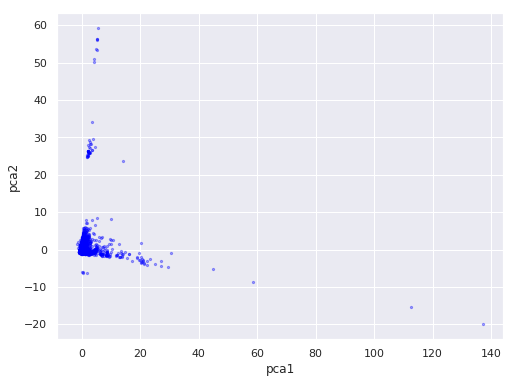

In [0]:
def var_scatter(df):
    ax=None
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))
    df.plot.scatter(x="pca1" , y="pca2", alpha=0.35, s=5, ax=ax, c = "blue")

    return ax

var_scatter(pcatdmNameClsDf);

In [0]:
clustering_kmeans = KMeans(n_clusters=4, precompute_distances="auto", n_jobs=-1)
pcatdmNameClsDf['clusters'] = clustering_kmeans.fit_predict(pcatdmNameClsDf)

In [0]:
pcatdmNameClsDf.head()

,pca1,pca2,clusters
0,-0.443310,-0.376881,0
1,-0.527583,-0.488772,0
2,-0.378910,-0.376659,0
3,0.010412,1.774910,0
4,-0.527583,-0.488772,0


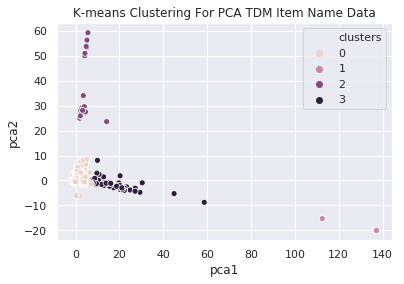

In [0]:
sns.scatterplot(x="pca1", y="pca2", hue=pcatdmNameClsDf['clusters'], data=pcatdmNameClsDf)
plt.title('K-means Clustering For PCA TDM Item Name Data')
plt.show()

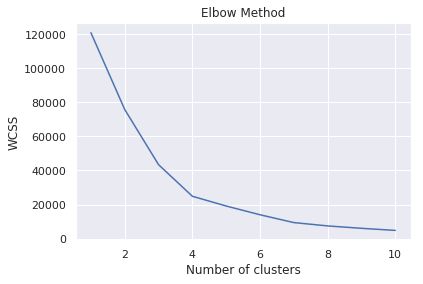

In [0]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pcatdmNameClsDf)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

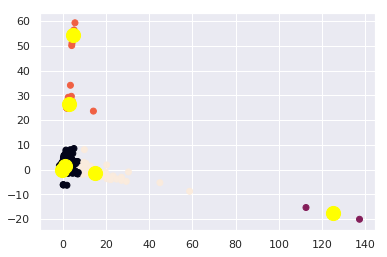

In [0]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(pcatdmNameClsDf)
plt.scatter(x="pca1", y="pca2", c=pcatdmNameClsDf['clusters'], data=pcatdmNameClsDf)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow')
plt.show()

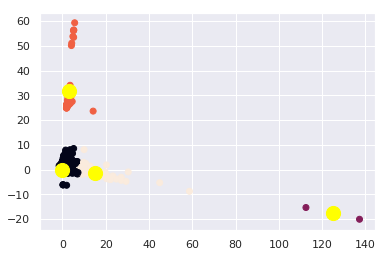

In [0]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(pcatdmNameClsDf)
plt.scatter(x="pca1", y="pca2", c=pcatdmNameClsDf['clusters'], data=pcatdmNameClsDf)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow')
plt.show()

# **Cluster Analysis of TF-IDF Data of Item Name**




In [0]:
tfidfItemNameDF.head(10)

,alan,allview,amazon,amoi,apartment,apple,archos,asus,blackberry,blackview,bmc,boxer,bungalow,cabin,cannondale,chalet,condominium,cooler,cottage,crimson,felt,fuji,google,jamis,keychain,lg,marin,merida,microsoft,nec,newfoundland,ochre,periwinkle,pillows,pomeranian,poodle,samsung,sony,tan,tiny,townhome,trek,ultramarine,wnd
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [0]:
from sklearn.preprocessing import StandardScaler
sctfidfDFIName = StandardScaler().fit_transform(tfidfItemNameDF)
sctfidfDFIName

array([[-4.01085726, -4.01539521, -6.0646214 , ..., -0.23280783,
        -4.21676659, -3.43037449],
       [-4.01085726, -4.01539521, -6.0646214 , ..., -0.23280783,
        -4.21676659, -3.43037449],
       [-4.01085726, -4.01539521, -6.0646214 , ..., -0.23280783,
        -4.21676659,  0.81581592],
       ...,
       [-1.29207668,  0.93002312,  0.01375871, ...,  4.29538819,
         0.57082932,  0.81581592],
       [-1.29207668,  0.93002312,  0.01375871, ...,  4.29538819,
         0.57082932,  0.81581592],
       [-1.29207668,  0.93002312,  0.01375871, ...,  4.29538819,
         0.57082932,  0.81581592]])

In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(sctfidfDFIName)
pcatfidfDFIName = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2'])

In [0]:
pcatfidfDFIName.head()

,pca1,pca2
0,16.840912,16.020542
1,16.840912,16.020542
2,16.866592,15.984102
3,16.840865,16.035114
4,16.840865,16.035114


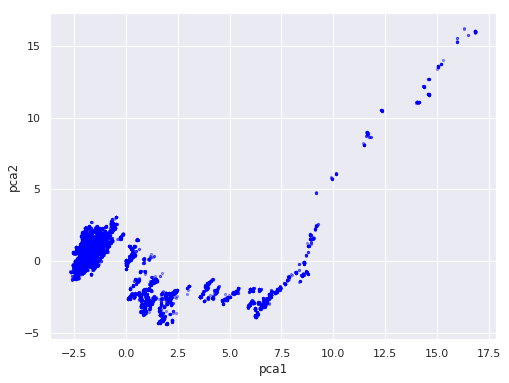

In [0]:
def var_scatter(df):
    ax=None
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))
    df.plot.scatter(x="pca1" , y="pca2", alpha=0.35, s=5, ax=ax, c = "blue")

    return ax

var_scatter(pcatfidfDFIName);

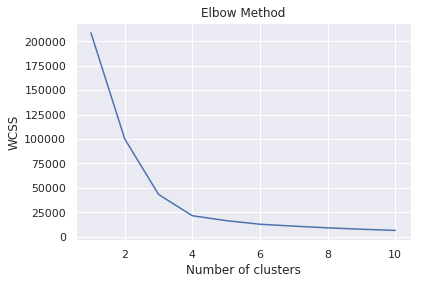

In [0]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pcatfidfDFIName)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
clustering_kmeans = KMeans(n_clusters=4, precompute_distances="auto", n_jobs=-1)
pcatfidfDFIName['clusters'] = clustering_kmeans.fit_predict(pcatfidfDFIName)

In [0]:
pcatfidfDFIName.head()

,pca1,pca2,clusters
0,16.840912,16.020542,3
1,16.840912,16.020542,3
2,16.866592,15.984102,3
3,16.840865,16.035114,3
4,16.840865,16.035114,3


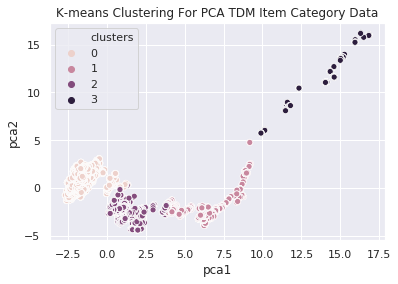

In [0]:
sns.scatterplot(x="pca1", y="pca2", hue=pcatfidfDFIName['clusters'], data=pcatfidfDFIName)
plt.title('K-means Clustering For PCA TDM Item Category Data')
plt.show()

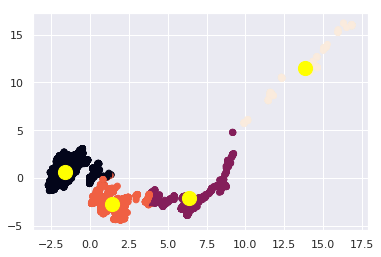

In [0]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(pcatfidfDFIName)
plt.scatter(x="pca1", y="pca2", c=pcatfidfDFIName['clusters'], data=pcatfidfDFIName)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow')
plt.show()

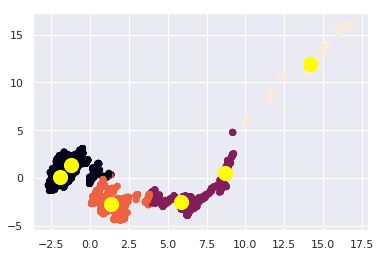

In [0]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(pcatfidfDFIName)
plt.scatter(x="pca1", y="pca2", c=pcatfidfDFIName['clusters'], data=pcatfidfDFIName)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow')
plt.show()

Axes3D.scatter(xs, ys, zs=0, zdir='z', s=20, c=None, depthshade=True, *args, **kwargs)

In [0]:
pcatfidfDFIName.head()

,pca1,pca2,clusters
0,16.840912,16.020542,3
1,16.840912,16.020542,3
2,16.866592,15.984102,3
3,16.840865,16.035114,3
4,16.840865,16.035114,3


Text(0.5, 0.92, '3D Plot K Means')

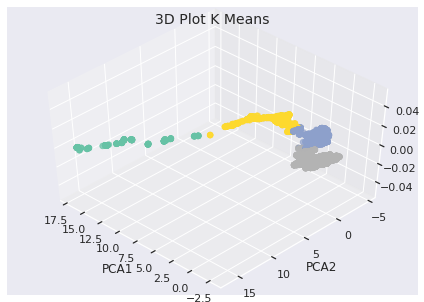

In [0]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn import datasets

pcatfidfDFIName['clusters']=pd.Categorical(pcatfidfDFIName['clusters'])
my_color=pcatfidfDFIName['clusters'].cat.codes


#KMeans
km = KMeans(n_clusters=4)
km.fit(pcatfidfDFIName)
km.predict(pcatfidfDFIName)
labels = km.labels_

#Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(pcatfidfDFIName['pca1'], pcatfidfDFIName['pca2'], c=my_color, cmap="Set2_r", s=30)
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")

plt.title("3D Plot K Means", fontsize=14)



# **silhouette analysis**

**Selecting the number of clusters with silhouette analysis on KMeans clustering**

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

The average silhouette scores :
For clusterVal = 2 The average silhouette_score is : 0.676823654091688
The average silhouette scores :
For clusterVal = 3 The average silhouette_score is : 0.7107916058918532
The average silhouette scores :
For clusterVal = 4 The average silhouette_score is : 0.7152434375889196
The average silhouette scores :
For clusterVal = 5 The average silhouette_score is : 0.49595402862833404
The average silhouette scores :
For clusterVal = 6 The average silhouette_score is : 0.4942487543740434
The average silhouette scores :
For clusterVal = 7 The average silhouette_score is : 0.5227399443180921
The average silhouette scores :
For clusterVal = 8 The average silhouette_score is : 0.5161836277457553
The average silhouette scores :
For clusterVal = 9 The average silhouette_score is : 0.5155693324154259


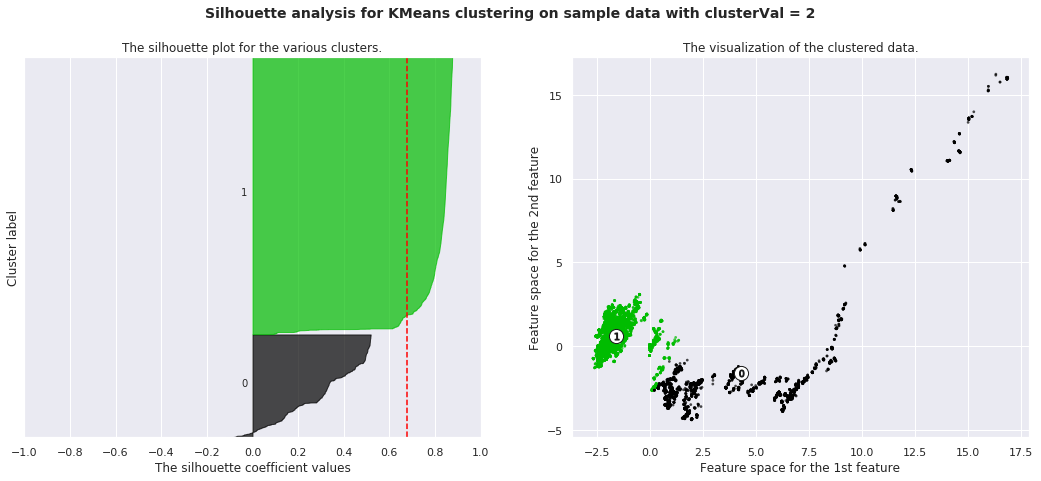

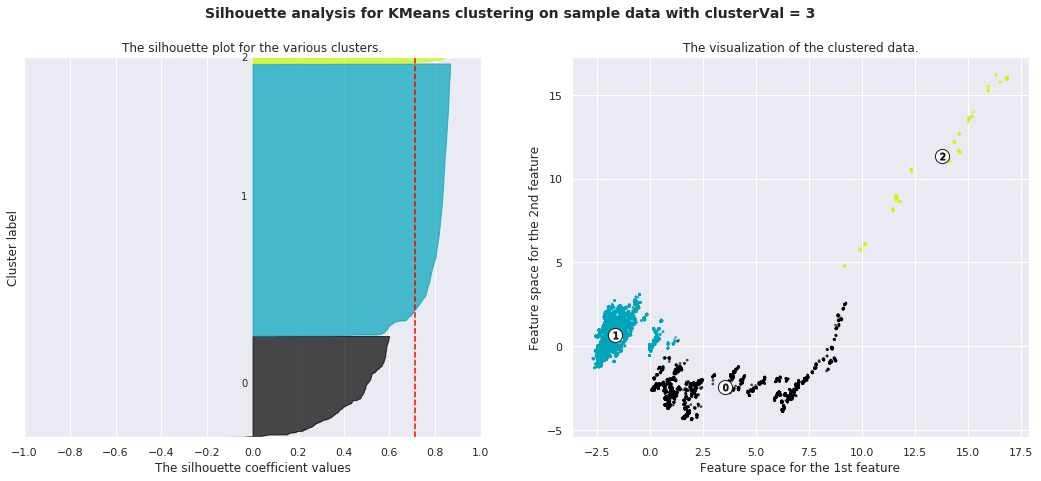

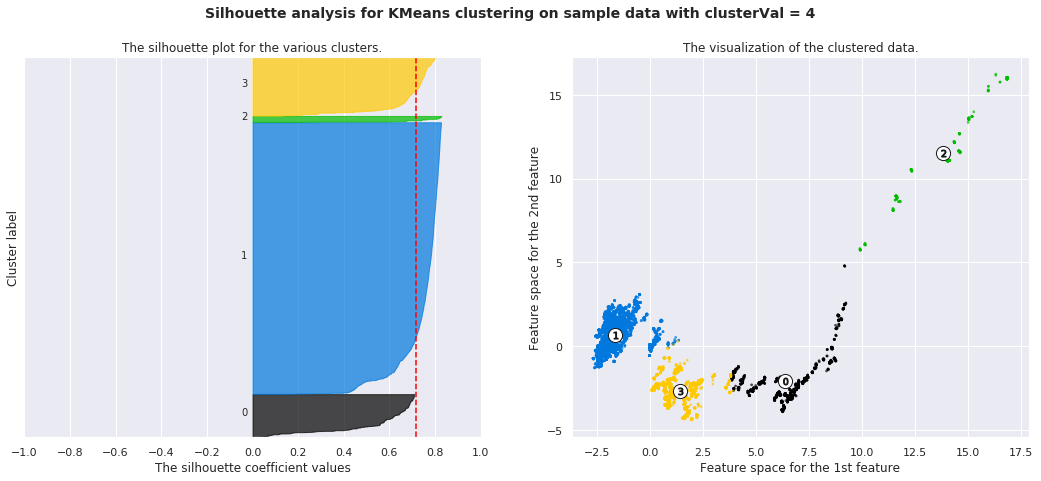

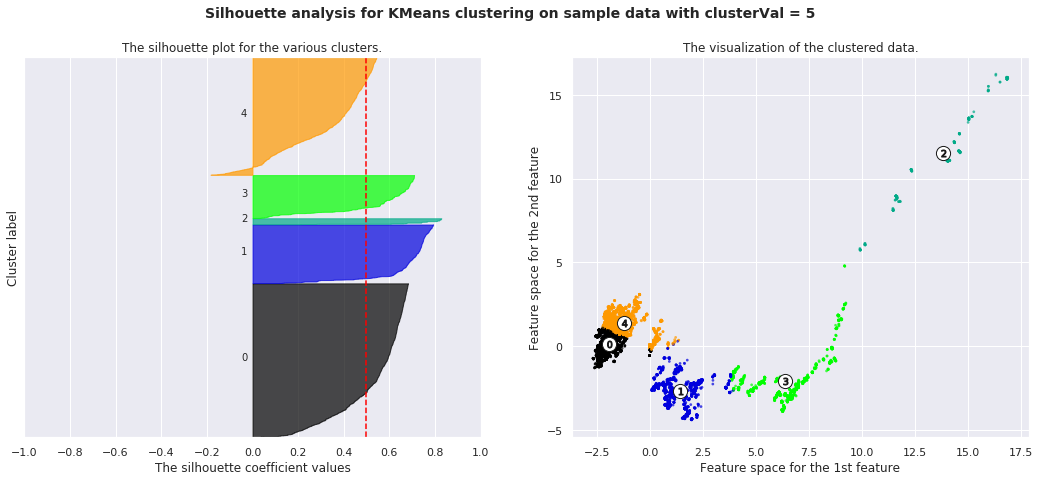

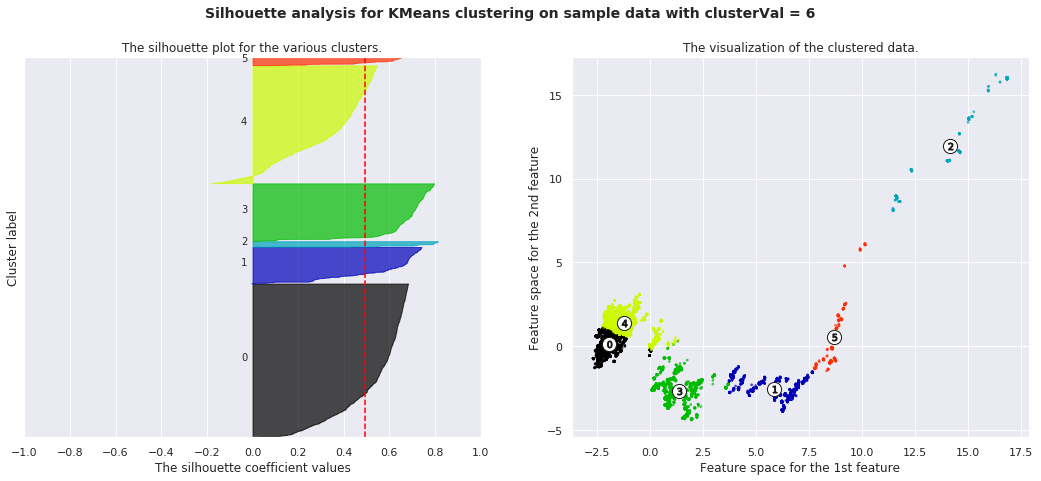

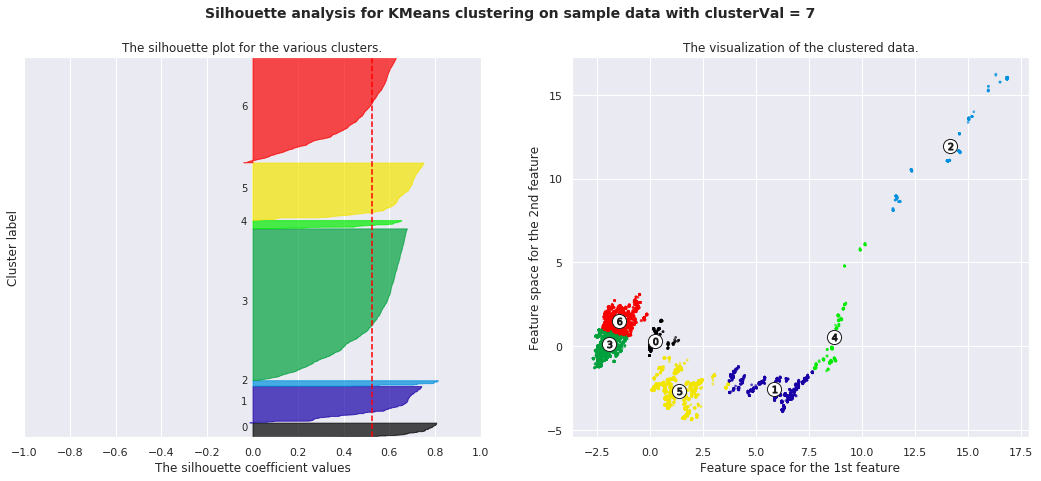

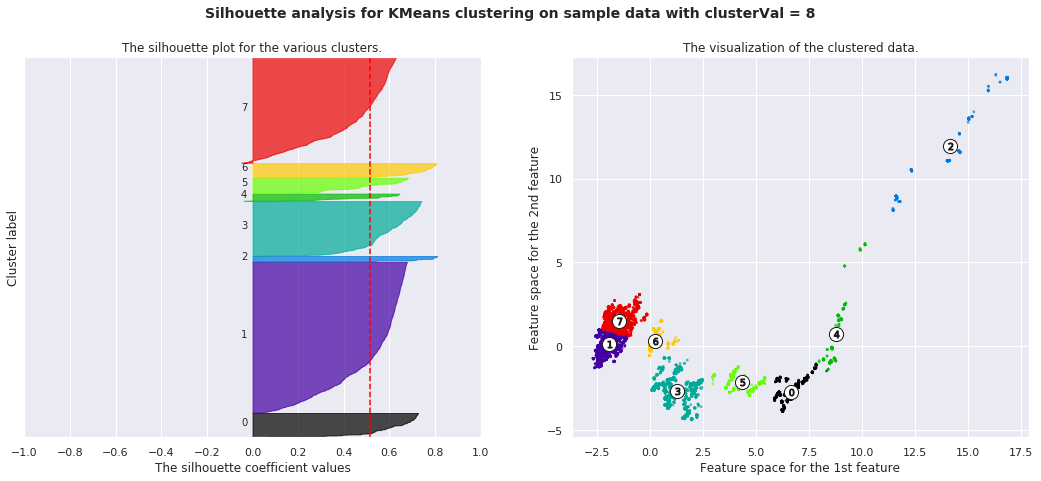

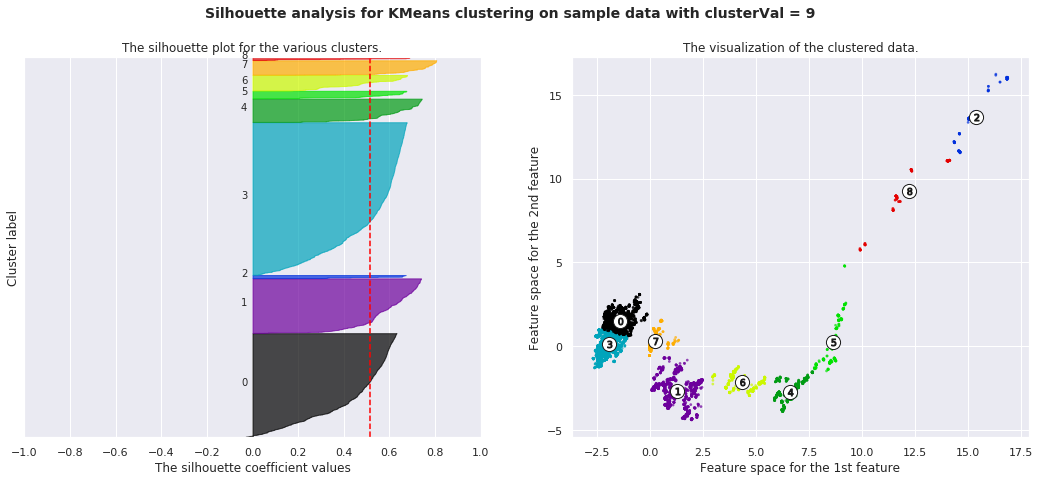

In [0]:

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

clusterRange = range(2,10)

for clusterVal in clusterRange:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-1, 1])
    # The (clusterVal+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pcatfidfDFIName) + (clusterVal + 1) * 10])

    clusterer = KMeans(n_clusters=clusterVal, random_state=10)
    cluster_labels = clusterer.fit_predict(pcatfidfDFIName)

    #silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    
    silhouette_avg = silhouette_score(pcatfidfDFIName, cluster_labels)
    print("The average silhouette scores :")
    print("For clusterVal =", clusterVal,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pcatfidfDFIName, cluster_labels)

    y_lower = 10
    for i in range(clusterVal):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / clusterVal)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / clusterVal)
    ax2.scatter(pcatfidfDFIName['pca1'], pcatfidfDFIName['pca2'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with clusterVal = %d" % clusterVal),
                 fontsize=14, fontweight='bold')

plt.show()

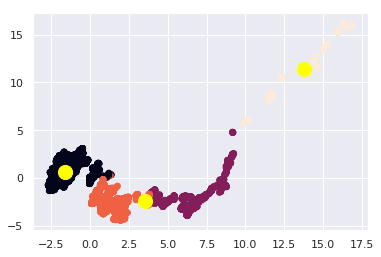

In [0]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(pcatfidfDFIName)
plt.scatter(x="pca1", y="pca2", c=pcatfidfDFIName['clusters'], data=pcatfidfDFIName)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow')
plt.show()

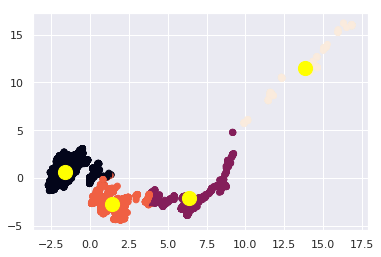

In [0]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(pcatfidfDFIName)
plt.scatter(x="pca1", y="pca2", c=pcatfidfDFIName['clusters'], data=pcatfidfDFIName)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow')
plt.show()

# **Hierarchical Clustering Analysis**



## TFIDF Item Name Data



In [0]:
sctfidfDFName = StandardScaler().fit_transform(tfidfItemNameDF)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(sctfidfDFName)
pcatfidfNameDf = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2'])

In [0]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(pcatfidfNameDf)

array([0, 0, 0, ..., 1, 1, 1])

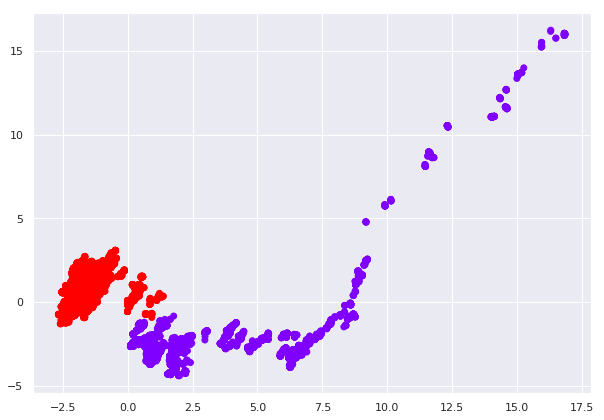

In [0]:
plt.figure(figsize=(10, 7))
plt.scatter(pcatfidfNameDf['pca1'], pcatfidfNameDf['pca2'], c=cluster.labels_, cmap='rainbow')

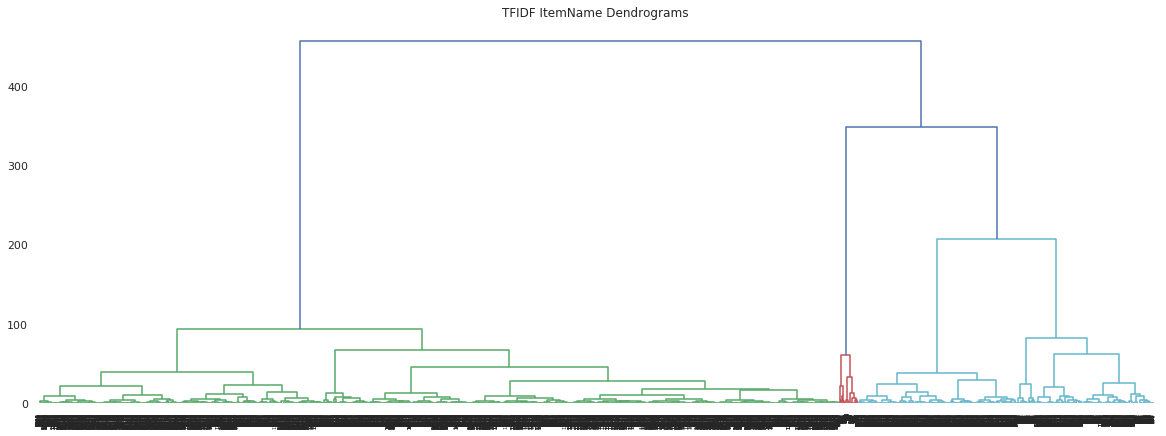

In [0]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 7))
plt.title("TFIDF ItemName Dendrograms")
dend = shc.dendrogram(shc.linkage(pcatfidfNameDf, method='ward'))

In [0]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(pcatfidfNameDf)

array([2, 2, 2, ..., 0, 0, 0])

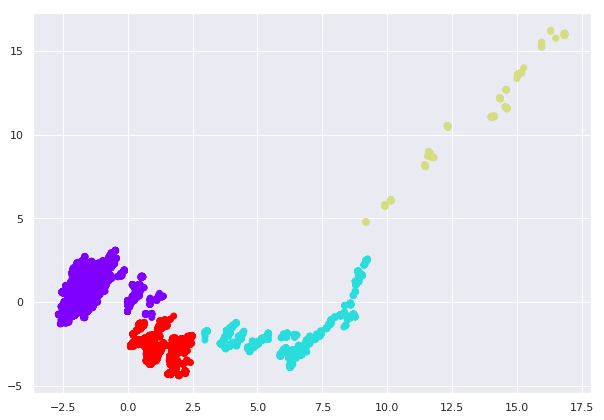

In [0]:
plt.figure(figsize=(10, 7))
plt.scatter(pcatfidfNameDf['pca1'], pcatfidfNameDf['pca2'], c=cluster.labels_, cmap='rainbow')